In [1]:
## Importing the required libraries 

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## understading the raw data 
fl_input=pd.read_csv('Leads.csv')
fl_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
## understanding the columns 
data_dict=pd.read_excel('Leads Data Dictionary.xlsx')
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


In [5]:
## given the desciption of the data set, there might be multiple entries for the same candidate if id this is
## a time based data 
fl_input['Prospect ID'].nunique()

## We can unique value by each customer type, so this makes the most granular part of the data

9240

In [6]:
## There are quite a few number of columns which have missing values, we can check these one by one for better
## understanding, there are around 30 missing values in it. 
# 1. Lead Source
fl_input['Lead Source'].value_counts()
## Most of the lead sources are arrived from Google and then the direct traffic

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [7]:
## We can check if there any relation between lead source and origin so that a missing value can be filled 
## for the lead source
print(fl_input[fl_input['Lead Source'].isna()]['Lead Origin'].value_counts())

## Missing lead source are coming from Lead Add form

Lead Add Form              33
Lead Import                 1
Quick Add Form              1
Landing Page Submission     1
Name: Lead Origin, dtype: int64


In [8]:
print(fl_input[fl_input['Lead Origin']=='Lead Add Form']['Lead Source'].value_counts())
## We can see that references make the most for Lead Add form, so we can fill the missing values in Lead Source
## with Reference, but to test that we can check it with 'Through Recommendations' columns, if all are yes
## then we can fill it with Reference

Reference           534
Welingak Website    142
Click2call            4
Olark Chat            2
Live Chat             2
Google                1
Name: Lead Source, dtype: int64


In [9]:
## We can se how through recommendations work for the same 
print(fl_input[fl_input['Lead Source'].isna()]['Through Recommendations'].value_counts())
## We can see all the 'NA' values does not have any recommendations, so we have to take the second best option for
## for the lead Add Foram to be 'Welingak Website'
fl_input['Lead Source'].fillna('Welingak Website',inplace=True)

No    36
Name: Through Recommendations, dtype: int64


In [10]:
fl_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Min value : 0.0
Max value : 251.0
Mean value : 3.445237833681204


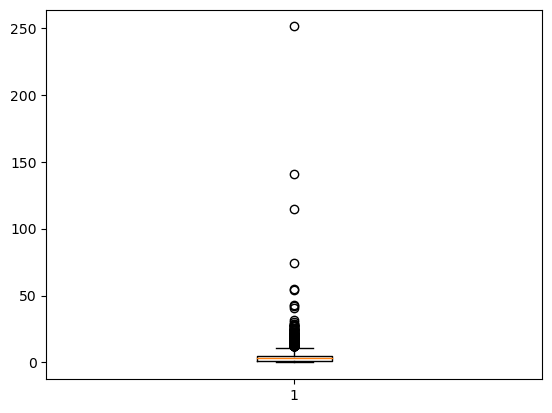

In [11]:
## 2. Total visits : The total number of visits made by the customer on the website

plt.boxplot(fl_input[fl_input['TotalVisits']<=1000]['TotalVisits'])
print('Min value :',fl_input['TotalVisits'].min())
print('Max value :',fl_input['TotalVisits'].max())
print('Mean value :',fl_input['TotalVisits'].mean())
plt.show()

## minimum are 0 visits and maximum is 251, now we have to check how to NA is related to converted and time spent 
## hypothesis is, does any customer convert without even visiting the site or spending any time on it

Min value : 0
Max value : 2272
Max value : 2272


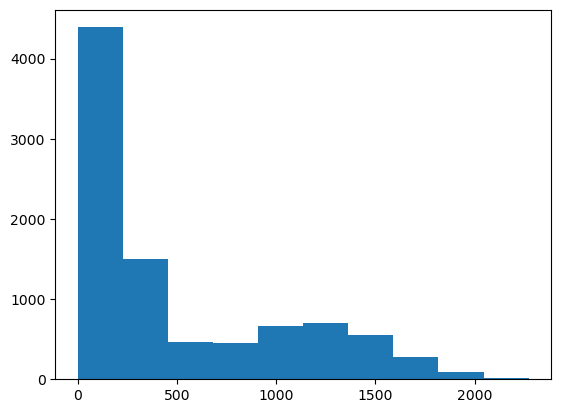

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [12]:
## Time spent on website is 0 minutes to 2000, anything nearing 0 means some seconds on the websites
plt.hist(fl_input[fl_input['TotalVisits']<=1000]['Total Time Spent on Website'])
print('Min value :',fl_input['Total Time Spent on Website'].min())
print('Max value :',fl_input['Total Time Spent on Website'].max())
print('Max value :',fl_input['Total Time Spent on Website'].max())
plt.show()
fl_input['Total Time Spent on Website'].value_counts()

Min value : 11
Max value : 2217


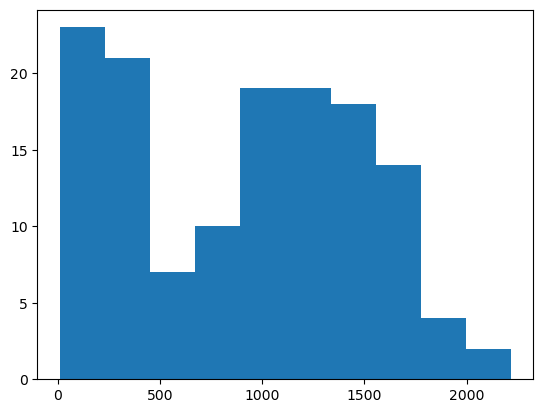

31      1
1111    1
986     1
889     1
1240    1
       ..
1212    2
1427    2
289     2
266     2
417     2
Name: Total Time Spent on Website, Length: 131, dtype: int64

In [13]:
## Now for NA values in visits, the time spent > 0, which definitely means that a lead has visited the websites
## atleast once, so we cannot will NA with 0. Also the max value has a range > 2000 in time spent which can 
## attribute to that a person has visited the website multiple times too. 

plt.hist(fl_input[fl_input['TotalVisits'].isna()]['Total Time Spent on Website'])
print('Min value :',fl_input[fl_input['TotalVisits'].isna()]['Total Time Spent on Website'].min())
print('Max value :',fl_input[fl_input['TotalVisits'].isna()]['Total Time Spent on Website'].max())
plt.show()
fl_input[fl_input['TotalVisits'].isna()]['Total Time Spent on Website'].value_counts().sort_values()

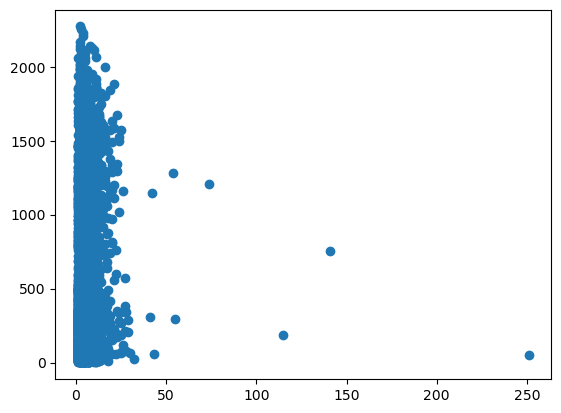

In [14]:
## Now I just want to check if there is any linear relationship between the total visits and total time spent,
## to fill na.
plt.scatter(fl_input[(fl_input['Total Time Spent on Website']>0) & (fl_input['TotalVisits']>0)]['TotalVisits'],
            fl_input[(fl_input['Total Time Spent on Website']>0) & (fl_input['TotalVisits']>0)]['Total Time Spent on Website'])

## It can be seen that there is no clear relationship between the time spend and visits, so I can fill the 
## value with median of the visits, to not attribute the impact of outliers

In [15]:
## The Page Views Per Visit and TotalVisits, both has similar number of Nulls in it, we can see if by each row
## the values are missing for the same
fl_input[fl_input['TotalVisits'].isna()]['Page Views Per Visit'].isna().all()

## for all the Null values in TotalVisits, we have same Nulls in Page Views, now we can how Page views are distributed
## to fill that

True

Min value : 0.0
Max value : 55.0
Mean value : 2.3628199494672093


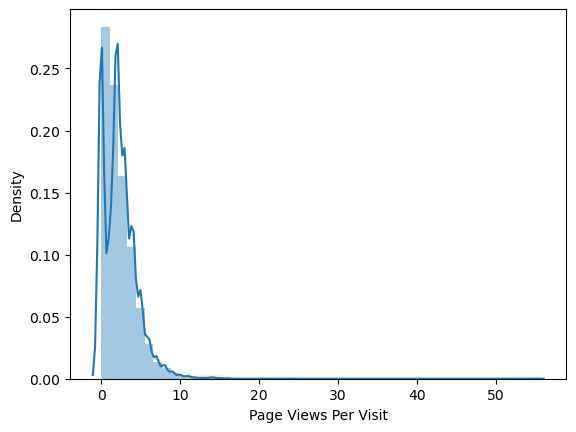

In [16]:
sns.distplot(fl_input['Page Views Per Visit'])
print('Min value :',fl_input['Page Views Per Visit'].min())
print('Max value :',fl_input['Page Views Per Visit'].max())
print('Mean value :',fl_input['Page Views Per Visit'].mean())
plt.show()

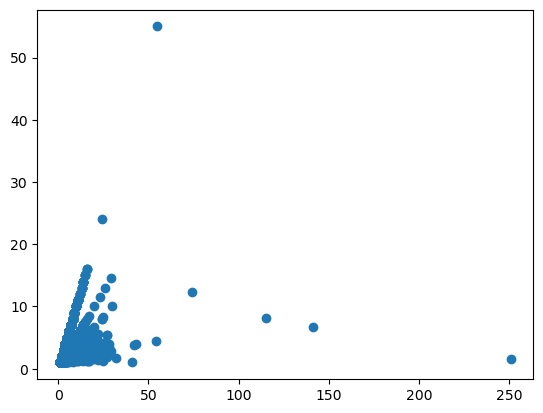

In [17]:
## relation between visits and number of pages.
plt.scatter(fl_input[(fl_input['Total Time Spent on Website']>0) & (fl_input['TotalVisits']>0)]['TotalVisits'],
            fl_input[(fl_input['Total Time Spent on Website']>0) & (fl_input['TotalVisits']>0)]['Page Views Per Visit'])


In [18]:
## filling NA values with median for the columns for both total visits and peges per visits, to reduce the 
## impact of outliers
fl_input['TotalVisits'].fillna(fl_input['TotalVisits'].median(),inplace=True)
fl_input['Page Views Per Visit'].fillna(fl_input['Page Views Per Visit'].median(),inplace=True)

In [19]:
## Check the unique activities
fl_input['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
## In the customer Ids whose last activity is not logged, gets converted in majority as compared to not
## which is significant enough to understand which activity is leading to most conversions and the ones did not
fl_input[fl_input['Last Activity'].isna()]['Converted'].value_counts()

1    81
0    22
Name: Converted, dtype: int64

In [21]:
print('Activities leading to Conversion:')
print(fl_input[fl_input['Converted']==1]['Last Activity'].value_counts())
print(' ')
print('Activities leading to not conversion')
print(fl_input[fl_input['Converted']==0]['Last Activity'].value_counts())

## From the output, it can be seen that email opened and sms sent both have uniform probability to conversion
## as well as not, so there is not clear winner in this case, we can drop these rows

Activities leading to Conversion:
SMS Sent                        1727
Email Opened                    1253
Page Visited on Website          151
Olark Chat Conversation           84
Email Link Clicked                73
Converted to Lead                 54
Unreachable                       31
Form Submitted on Website         28
Email Bounced                     26
Had a Phone Conversation          22
Unsubscribed                      16
Approached upfront                 9
Email Received                     2
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
 
Activities leading to not conversion
Email Opened                    2184
SMS Sent                        1018
Olark Chat Conversation          889
Page Visited on Website          489
Converted to Lead                374
Email Bounced                    300
Email Link Clicked               194
Form Submitted on Website         88
Unrea

In [22]:
fl_input = fl_input[fl_input['Last Activity'].notna()]

In [23]:
## Country data is biased towards Indian leads, so we can fill this column with India as base, as it will 
## follow the mose of the data 
print(fl_input.Country.value_counts())
fl_input.Country.fillna('India',inplace=True)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [24]:
fl_input.Specialization.value_counts()

Select                               1888
Finance Management                    966
Human Resource Management             839
Marketing Management                  825
Operations Management                 500
Business Administration               402
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 157
E-COMMERCE                            112
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
## Checking the unique combinations of Specialization with current occupation, Mostly the ones with no specialization
## are student, unemplaoyed or businessmesn
fl_input[(fl_input['Specialization']=='Select') | (fl_input['Specialization'].isna())][['Specialization','What is your current occupation']].drop_duplicates()

,Specialization,What is your current occupation
0,Select,Unemployed
5,NaN,NaN
28,Select,Student
143,Select,NaN
728,NaN,Working Professional
818,Select,Working Professional
4043,NaN,Student
6284,Select,Other
8571,Select,Businessman
8839,NaN,Businessman


In [26]:
## Most of the people which does not have any specialization are Unemployed or students, which makes sense. 
fl_input[(fl_input['Specialization']=='Select') | (fl_input['Specialization'].isna())]['What is your current occupation'].value_counts()

Unemployed              1775
Student                   85
Working Professional      30
Businessman                2
Other                      1
Name: What is your current occupation, dtype: int64

In [27]:
## For most where occupation is not provided, their specialization is also NULL. given total nulls ~2000
fl_input[(fl_input['What is your current occupation'].isna())]['Specialization'].value_counts()

Finance Management                   214
Human Resource Management            172
Marketing Management                 160
Operations Management                108
Business Administration               89
IT Projects Management                88
Supply Chain Management               71
Banking, Investment And Insurance     69
Travel and Tourism                    53
Media and Advertising                 41
International Business                40
Healthcare Management                 34
E-COMMERCE                            31
Retail Management                     22
Hospitality Management                21
Rural and Agribusiness                15
Services Excellence                   15
E-Business                            14
Select                                13
Name: Specialization, dtype: int64

In [28]:
## For the time being we can fill specialization with select and for current occupation we can drop that column
fl_input['Specialization'].fillna('Select',inplace=True)

In [29]:
fl_input.drop(columns='What is your current occupation',inplace=True)

In [30]:
## Now checking with how heard about X education
fl_input['How did you hear about X Education'].value_counts()

## this column has very less info about how they hear as > 50% of data is Select + NA, so we can drop this column

Select                   4940
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
fl_input.drop(columns='How did you hear about X Education',inplace=True)

In [32]:
## Now checking with how heard about X education
fl_input['What matters most to you in choosing a course'].value_counts()

## This column has only single value which is biasing the whole data , so it will not add any value , we can remove

Better Career Prospects      6426
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
fl_input.drop(columns='What matters most to you in choosing a course',inplace=True)

In [34]:
fl_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9137 non-null   object 
 1   Lead Number                               9137 non-null   int64  
 2   Lead Origin                               9137 non-null   object 
 3   Lead Source                               9137 non-null   object 
 4   Do Not Email                              9137 non-null   object 
 5   Do Not Call                               9137 non-null   object 
 6   Converted                                 9137 non-null   int64  
 7   TotalVisits                               9137 non-null   float64
 8   Total Time Spent on Website               9137 non-null   int64  
 9   Page Views Per Visit                      9137 non-null   float64
 10  Last Activity                       

In [35]:
## As most of the values in tags are , responsing after reading the email, so we can replace Nulls with the same
fl_input.Tags.value_counts()

Will revert after reading the email                  2046
Ringing                                              1191
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    311
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [36]:
fl_input.Tags.fillna('Will revert after reading the email',inplace=True)

Columns 'lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score' have more than 50% missing values
       so we can remove these

In [37]:
fl_input.drop(columns=['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [38]:
fl_input['Lead Profile'].value_counts()

## This has alot of select values in it, which is Kind of NULL so we can remove this to

Select                         4092
Potential Lead                 1573
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [39]:
fl_input.drop(columns=['Lead Profile'],inplace=True)

In [40]:
fl_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9137 non-null   object 
 1   Lead Number                               9137 non-null   int64  
 2   Lead Origin                               9137 non-null   object 
 3   Lead Source                               9137 non-null   object 
 4   Do Not Email                              9137 non-null   object 
 5   Do Not Call                               9137 non-null   object 
 6   Converted                                 9137 non-null   int64  
 7   TotalVisits                               9137 non-null   float64
 8   Total Time Spent on Website               9137 non-null   int64  
 9   Page Views Per Visit                      9137 non-null   float64
 10  Last Activity                       

In [41]:
## Check for City 
print(fl_input.City.value_counts())

## Everything is either Mumbai or anything in Maharashtra, In the country column, we have othe countries too
## so filling the NULL values with Mumbai will not make sense, we can drop this columns
fl_input.drop(columns=['City'],inplace=True)

Mumbai                         3186
Select                         2198
Thane & Outskirts               749
Other Cities                    680
Other Cities of Maharashtra     451
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64


In [42]:
## Final dataset without any missing values. 
fl_clean=fl_input.copy()
fl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9137 non-null   object 
 1   Lead Number                               9137 non-null   int64  
 2   Lead Origin                               9137 non-null   object 
 3   Lead Source                               9137 non-null   object 
 4   Do Not Email                              9137 non-null   object 
 5   Do Not Call                               9137 non-null   object 
 6   Converted                                 9137 non-null   int64  
 7   TotalVisits                               9137 non-null   float64
 8   Total Time Spent on Website               9137 non-null   int64  
 9   Page Views Per Visit                      9137 non-null   float64
 10  Last Activity                       

## Data Cleaning within columns

In [43]:
## This column looks clean and has less number of categories
fl_clean['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [44]:
## Lead Source has multiple categories in it, we can try Reducing the categories by merging two or more
print(fl_clean['Lead Source'].unique())

## cleaning google for google
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['google','Google','bing','Organic Search']),'Search',fl_clean['Lead Source'])

## cleaning Social Media for Facebook
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['Social Media','Facebook']),'SocialMedia',fl_clean['Lead Source'])


## cleaning all the referrals together
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['Reference','Referral Sites','Welingak Website'
                                                               ]),'Referrals',fl_clean['Lead Source'])


## Clubbing all the Ads to be the one category
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['Click2call','Press_Release','youtubechannel',
                                                               'Pay per Click Ads','testone'
                                                               ]),'Adverts',fl_clean['Lead Source'])


## Clubbing all the chats
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['Olark Chat','Live Chat'
                                                               ]),'ChatBots',fl_clean['Lead Source'])


## Clubbing all the blogs
fl_clean['Lead Source']=np.where(fl_clean['Lead Source'].isin(['welearnblog_Home','WeLearn','blog','NC_EDM'
                                                               ]),'Blogs',fl_clean['Lead Source'])



['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


In [45]:
fl_clean['Lead Source'].value_counts()

Search            4033
Direct Traffic    2543
ChatBots          1757
Referrals          750
SocialMedia         41
Adverts              9
Blogs                4
Name: Lead Source, dtype: int64

In [46]:
fl_clean['Specialization']=fl_clean['Specialization'].replace({'Select':'Other'})

In [47]:
## Tags can useful, but few of them has a very less number of records and does not make sense, so we can try 
## clubbing those together 

fl_clean['Tags'].value_counts()/fl_clean.shape[0]*100

Will revert after reading the email                  58.990916
Ringing                                              13.034913
Interested in other courses                           5.570756
Already a student                                     5.089198
Closed by Horizzon                                    3.403743
switched off                                          2.626683
Busy                                                  2.024735
Lost to EINS                                          1.893400
Not doing further education                           1.586954
Interested  in full time MBA                          1.269563
Graduation in progress                                1.214841
invalid number                                        0.908394
Diploma holder (Not Eligible)                         0.689504
wrong number given                                    0.514392
opp hangup                                            0.361169
number not provided                                   0

In [48]:
## Relationship between Last Activity and Last Notable Acivity
pd.crosstab(fl_clean['Last Activity'], columns=[fl_clean['Last Notable Activity']]).apply(lambda row: row/row.sum()*100, axis=1)

## It can be seen that, Last activity is more descriptive in nature while in notable section it has all moved 
## to a modified section, many categories have more than 50% match, so we can keep any one of these columns to 
## remove any correlation. This can also mean that how we have changed from last activity to a modified one
## that is same person moved from a previous step to next step, we can provide a tag as 0 or 1 

Last Notable Activity,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
Last Activity,,,,,,,,,,,,,,,,
Approached upfront,11.111111,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,88.888889,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Converted to Lead,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Email Bounced,0.000000,18.404908,0.000000,0.0,0.000000,0.0,0.000000,0.000000,81.595092,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Email Link Clicked,0.000000,0.000000,64.794007,0.0,0.000000,0.0,0.000000,0.000000,35.205993,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Email Marked Spam,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Email Opened,0.000000,0.000000,0.000000,0.0,82.251964,0.0,0.000000,0.000000,17.748036,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Email Received,0.000000,0.000000,0.000000,0.0,0.000000,50.0,0.000000,0.000000,50.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Form Submitted on Website,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.862069,0.000000,99.137931,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000
Had a Phone Conversation,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,46.666667,53.333333,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000


In [49]:
fl_clean['Action_Change']=np.where(fl_clean['Last Notable Activity']=='Modified',1,0)

In [50]:
## removing last notable activity column, as it is not descriptive enough, given modified has multiple meanings
#fl_clean.drop(columns='Last Notable Activity',inplace=True)

In [51]:
fl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9137 non-null   object 
 1   Lead Number                               9137 non-null   int64  
 2   Lead Origin                               9137 non-null   object 
 3   Lead Source                               9137 non-null   object 
 4   Do Not Email                              9137 non-null   object 
 5   Do Not Call                               9137 non-null   object 
 6   Converted                                 9137 non-null   int64  
 7   TotalVisits                               9137 non-null   float64
 8   Total Time Spent on Website               9137 non-null   int64  
 9   Page Views Per Visit                      9137 non-null   float64
 10  Last Activity                       

In [52]:
## Univariate analysis for the numeric columns
fl_input.describe()

## Convertion rate is around 38% fromt the mean, lets check for class imbalance 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9137.000000,9137.000000,9137.000000,9137.000000,9137.000000
mean,617060.258619,0.380869,3.443581,482.491409,2.361470
std,23353.028134,0.485627,4.845886,545.614027,2.157505
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596412.000000,0.000000,1.000000,10.000000,1.000000
50%,615320.000000,0.000000,3.000000,246.000000,2.000000
75%,637189.000000,1.000000,5.000000,921.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [53]:
fl_clean['Converted'].value_counts()/fl_clean.shape[0]*100
## Classes are in 40/60 which is feasible enough for the classification and not imbalanced much to bias the results

0    61.913101
1    38.086899
Name: Converted, dtype: float64

In [156]:
fl_clean['Converted'].value_counts()/fl_clean.shape[0]*100

0    61.989223
1    38.010777
Name: Converted, dtype: float64

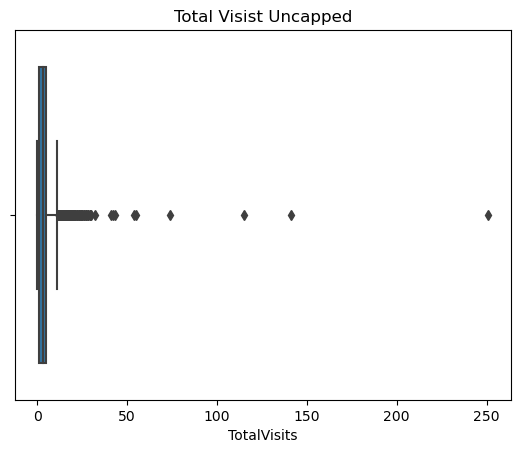

Deciling of the column
0.0    0.0
0.1    0.0
0.2    0.0
0.3    2.0
0.4    2.0
0.5    3.0
0.6    3.0
0.7    4.0
0.8    5.0
0.9    7.0
Name: TotalVisits, dtype: float64
Description:
count    9137.000000
mean        3.443581
std         4.845886
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [54]:
## Univariate analysis on the Visits

sns.boxplot(fl_clean[fl_clean.TotalVisits<=255]['TotalVisits'])
plt.title('Total Visist Uncapped')
plt.show()
print('Deciling of the column')
print(fl_clean.TotalVisits.quantile(np.arange(0,1,.1)))

print('Description:')
print(fl_clean.TotalVisits.describe())

## Data seems quite skewed, we can think of an outlier treatment.

It can be seen that around 20% of the customers never visited the website and 90% of the data has values with 
total visits less than 10. So we can cap it to 9th quantile value + 1.5(IQR) <br> 
Here : IQR = 5-1 = 4 , 2*4= 6  <br>
90th Quantile = 7 <br>
Max Capped = 7 + 2*IQR = 7+8 = 15

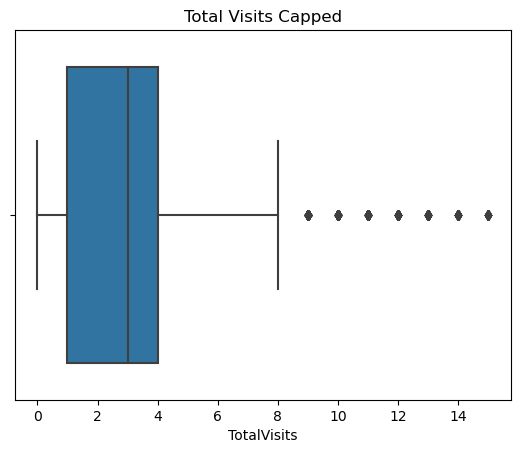

Percentage of removed after outlier treatment
0.0


In [161]:
## capping the visits to 15 and treating rest as outliers to be removed from the data, checking the percentage of
## values removed from the column
sns.boxplot(fl_clean[fl_clean.TotalVisits<=15]['TotalVisits'])
plt.title('Total Visits Capped')
plt.show()

print('Percentage of removed after outlier treatment')
print(fl_clean[fl_clean.TotalVisits>15].shape[0]/fl_clean.shape[0]*100)

## Around 1% of the data will be removed, so we can remove these.

In [56]:
fl_clean=fl_clean[fl_clean['TotalVisits']<=15]

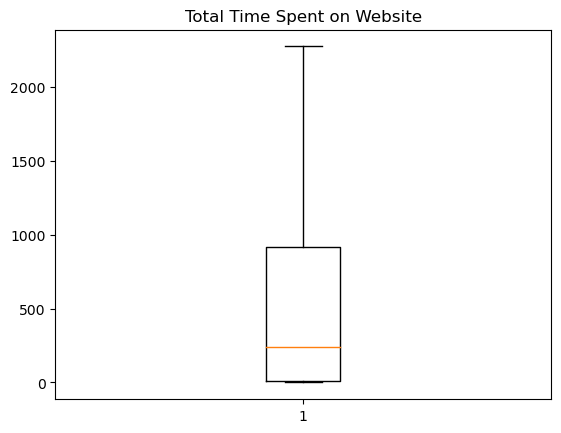

Deciling of the column
0.0       0.0
0.1       0.0
0.2       0.0
0.3      50.0
0.4     140.0
0.5     242.0
0.6     363.6
0.7     683.2
0.8    1072.8
0.9    1371.0
Name: Total Time Spent on Website, dtype: float64
Description:
count    9017.000000
mean      479.599534
std       544.726313
min         0.000000
25%         7.000000
50%       242.000000
75%       914.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


In [57]:
## Check for total time spent,
plt.boxplot(fl_clean['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

print('Deciling of the column')
print(fl_clean['Total Time Spent on Website'].quantile(np.arange(0,1,.1)))

print('Description:')
print(fl_clean['Total Time Spent on Website'].describe())

Here also, 20% of the people reflects the same as no visit to the website, and from the outliers perpective it
seems fine so we can keep it as it is

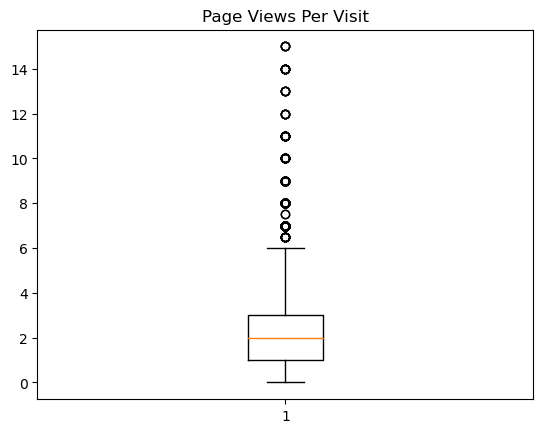

Deciling of the column
0.0    0.0
0.1    0.0
0.2    0.0
0.3    1.0
0.4    2.0
0.5    2.0
0.6    2.5
0.7    3.0
0.8    4.0
0.9    5.0
Name: Page Views Per Visit, dtype: float64
Description:
count    9017.000000
mean        2.327069
std         2.043506
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Page Views Per Visit, dtype: float64


In [58]:
## Check for pages per views
plt.boxplot(fl_clean['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

print('Deciling of the column')
print(fl_clean['Page Views Per Visit'].quantile(np.arange(0,1,.1)))

print('Description:')
print(fl_clean['Page Views Per Visit'].describe())

From the Box plot it can be attributed that 90% of the customers does not scroll more that 5 pages in total visits
so we can cap this to 8 pages from the above information

In [59]:
fl_clean=fl_clean[fl_clean['Page Views Per Visit']<=8]

In [60]:
fl_final=fl_clean.copy()

In [61]:
## This is the final data set, after capping the outliers and maintaining the average behaviour of the customers
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8908 non-null   object 
 1   Lead Number                               8908 non-null   int64  
 2   Lead Origin                               8908 non-null   object 
 3   Lead Source                               8908 non-null   object 
 4   Do Not Email                              8908 non-null   object 
 5   Do Not Call                               8908 non-null   object 
 6   Converted                                 8908 non-null   int64  
 7   TotalVisits                               8908 non-null   float64
 8   Total Time Spent on Website               8908 non-null   int64  
 9   Page Views Per Visit                      8908 non-null   float64
 10  Last Activity                       

In [62]:
fl_final.shape[0]/fl_input.shape[0]*100

## We have removed around 3% of the information from the raw data based on the number of rows, this should be 
## good enough to use further

97.49370690598664

### Bivariate Analysis - Impact of Variables on each other and the target

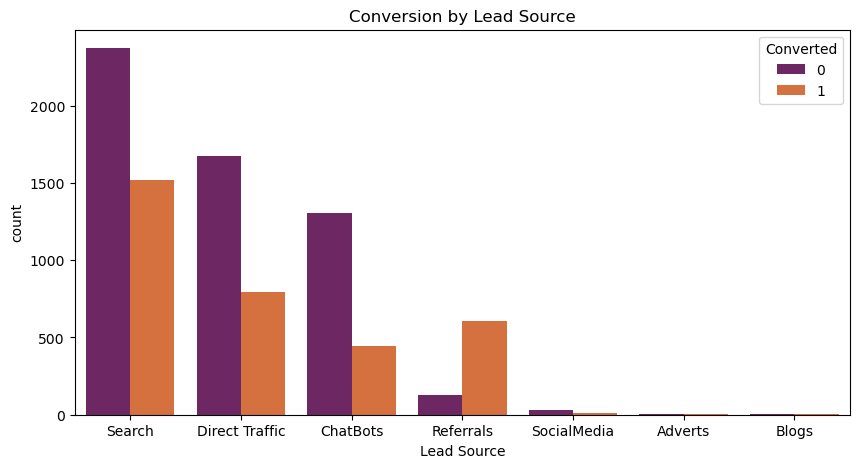

In [63]:
## Relationship between lead origin and source - and how it impacts the conversion
plt.figure(figsize=[10,5])
sns.countplot('Lead Source',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Lead Source'].value_counts().index)
plt.title('Conversion by Lead Source')
plt.show()

Majority of Leads are coming from Search, but the best conversion is happening through referrals,

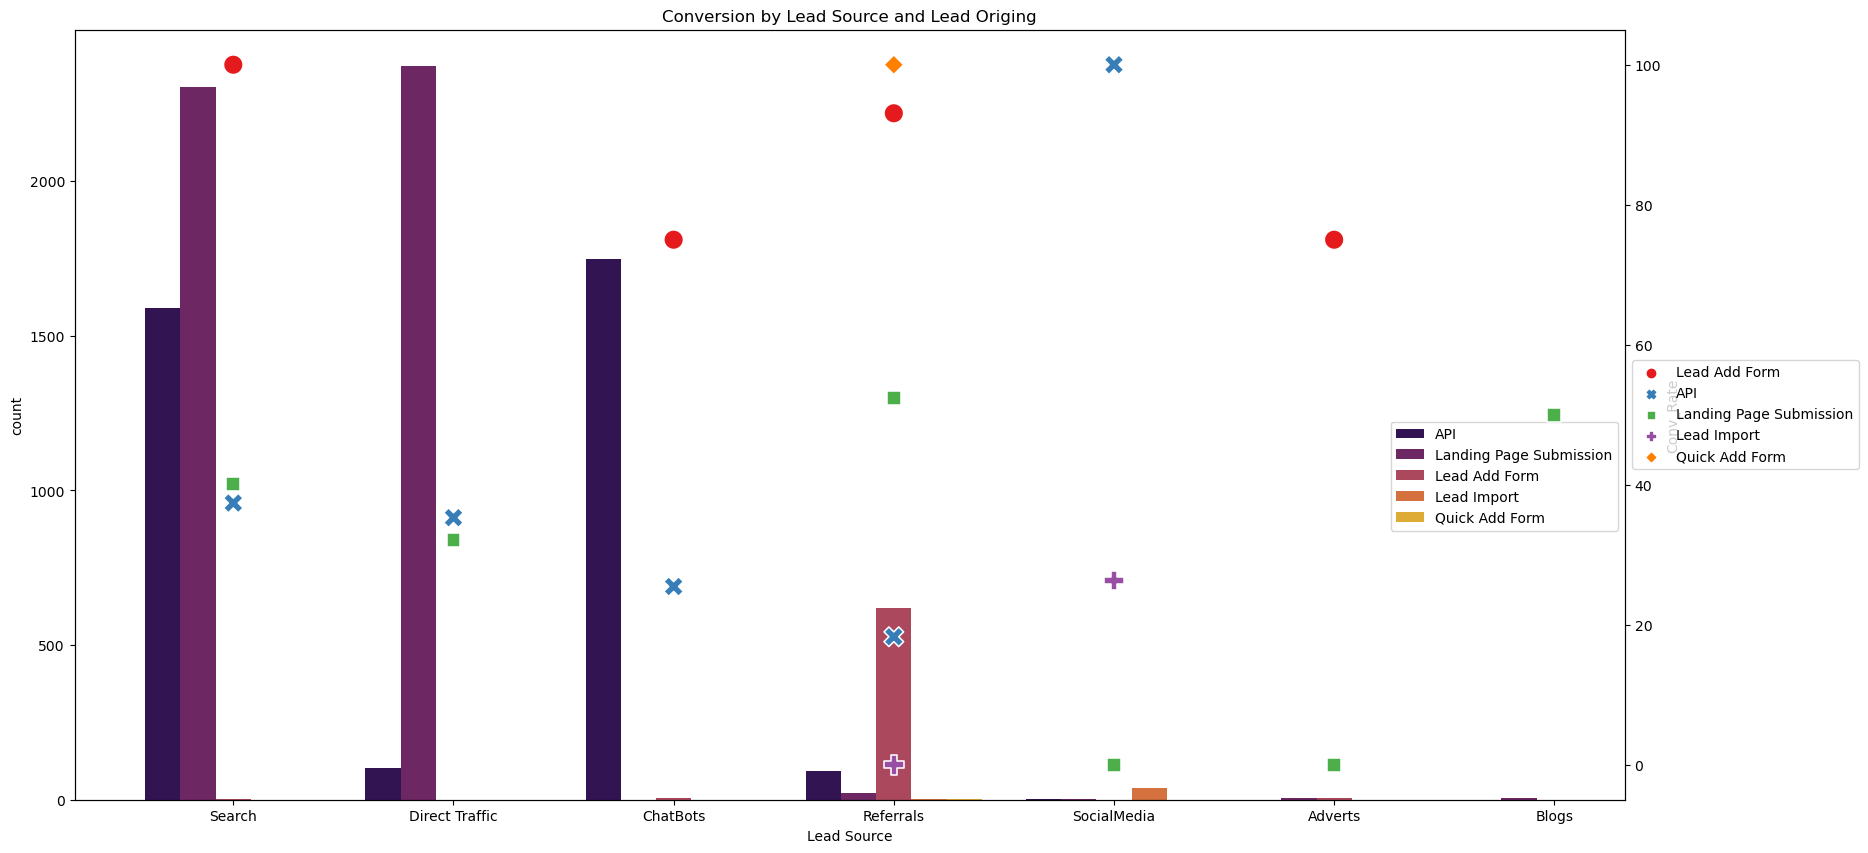

In [64]:
## Relationship between lead origin and source - and how it impacts the conversion
plt.figure(figsize=[20,10])
sns.countplot('Lead Source',hue='Lead Origin',data=fl_final,palette='inferno',
              order = fl_final['Lead Source'].value_counts().index)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

ax2 = plt.twinx()

conv_plot=fl_final.groupby(['Lead Source','Lead Origin']).agg({'Converted':'sum',
                                                                            'TotalVisits':'count'}).reset_index()
conv_plot['Conv_Rate']=conv_plot['Converted']/conv_plot['TotalVisits']*100
conv_plot['Tot']=conv_plot.groupby('Lead Source')['TotalVisits'].transform(np.sum)
conv_plot=conv_plot.sort_values(by=['Tot'],ascending=False)

sns.scatterplot('Lead Source','Conv_Rate',data=conv_plot, hue='Lead Origin', ax=ax2,palette='Set1',s=200,style='Lead Origin')

plt.title('Conversion by Lead Source and Lead Origing')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In Search and Chatbots, Consumers coming from Lead Add Form has higher conversion rate, so if we can drive the leads through that, we might end up having converted customers. Social Media has multiple origin points, but overall volume is less, but it has high range of conversion offering, this is one are where X Education can start investing to inccrease footprint.

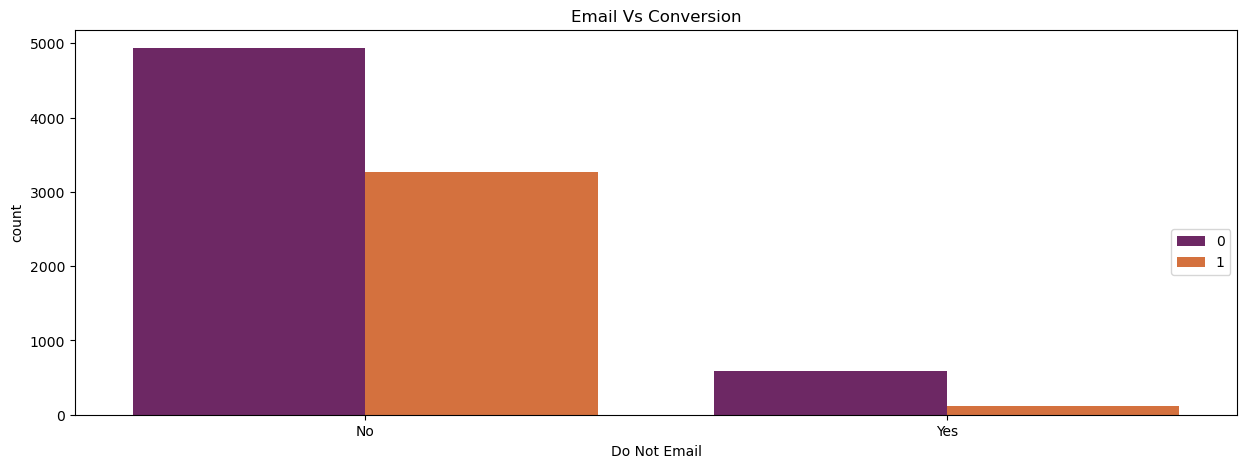

In [65]:
## Impact of call and emails on conversion 

plt.figure(figsize=[15,5])
sns.countplot('Do Not Email',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Do Not Email'].value_counts().index)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Email Vs Conversion')
plt.show()

The ones receiving email have higher probability to get converted. 

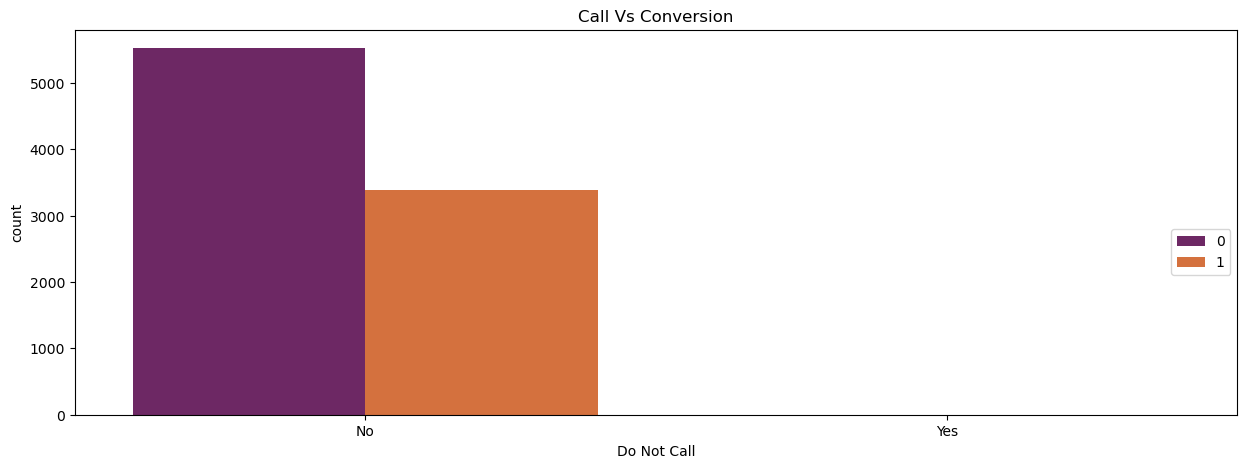

In [66]:
plt.figure(figsize=[15,5])
sns.countplot('Do Not Call',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Do Not Call'].value_counts().index)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Call Vs Conversion')
plt.show()

In [67]:
fl_final['Do Not Call'].value_counts()

No     8906
Yes       2
Name: Do Not Call, dtype: int64

Almost all the leads have opted for calling facility, so it does not add any extra information given all are treated the same, so we can remove this column

In [68]:
fl_final.drop(columns='Do Not Call',inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


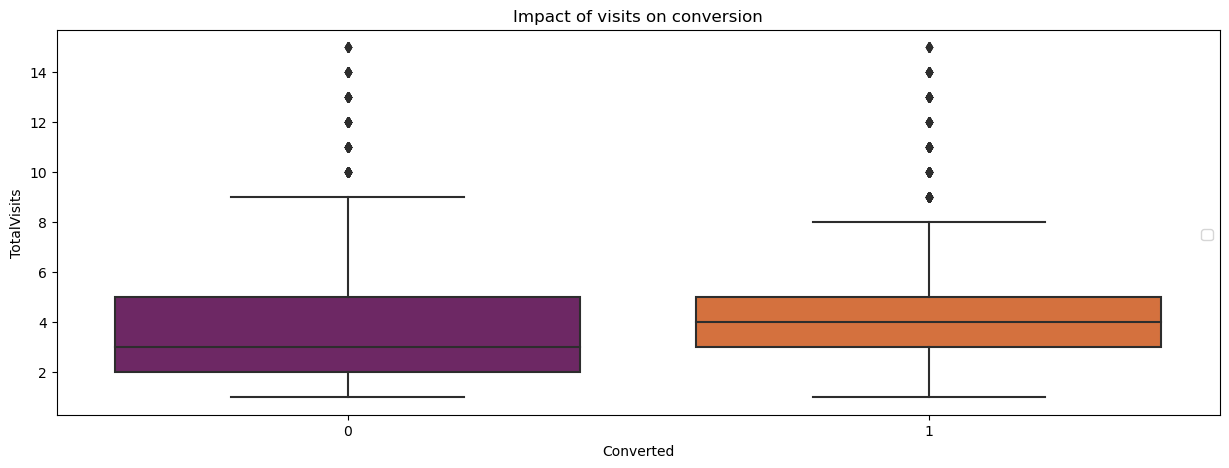

In [69]:
## Checking impact of total visits on the conversion, does higher visits lead to higher conversion

plt.figure(figsize=[15,5])
sns.boxplot(x='Converted',y='TotalVisits',data=fl_final[fl_final['TotalVisits']>0],palette='inferno')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Impact of visits on conversion')
plt.show()

In [70]:
## What happens in the case if there are 0 visits
fl_final[fl_final['TotalVisits']==0]['Converted'].value_counts()

## It can be seen that even though there are 0 visits , around 40% of those gets converted, which should be driven 
## be either emails or referrals as we could see above

0    1273
1     916
Name: Converted, dtype: int64

Total visits does not impact much on the conversion, on change is the spread of visits in broad in case of converted
as compared to non converted which more clustred around mean.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


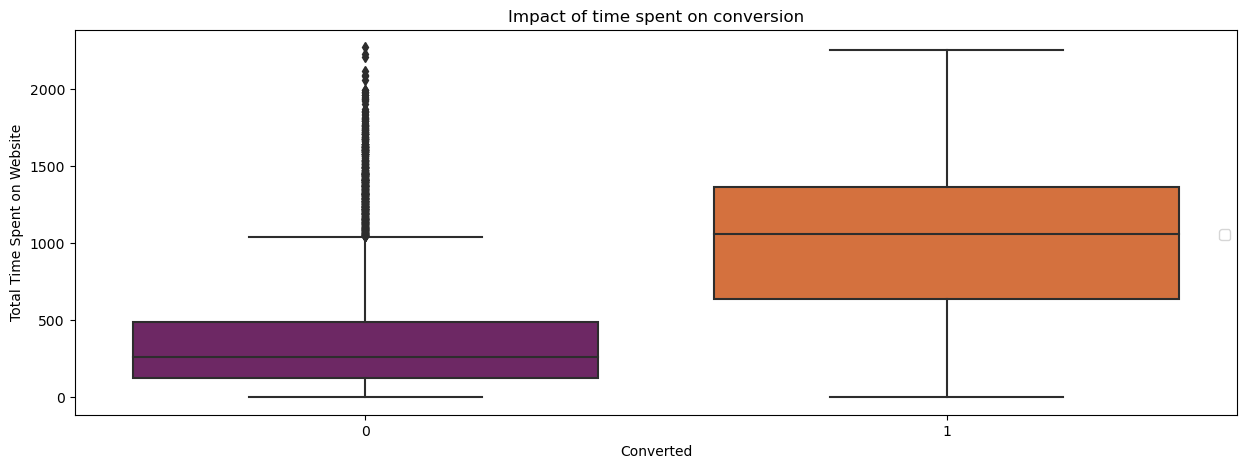

In [157]:
## Checking impact of Total Time Spent on Website on the conversion, does higher time leads to conversion

plt.figure(figsize=[15,5])
sns.boxplot(x='Converted',y='Total Time Spent on Website',data=fl_final[fl_final['TotalVisits']>0],palette='inferno')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Impact of time spent on conversion')
plt.show()

Here is a clear indication that, the ones who are coming on the website definitely has higher probability to get converted, means for people getting converted is significantly different from the ones who do not. If we are able to increase the time spent, he/she should be more likely to convert

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


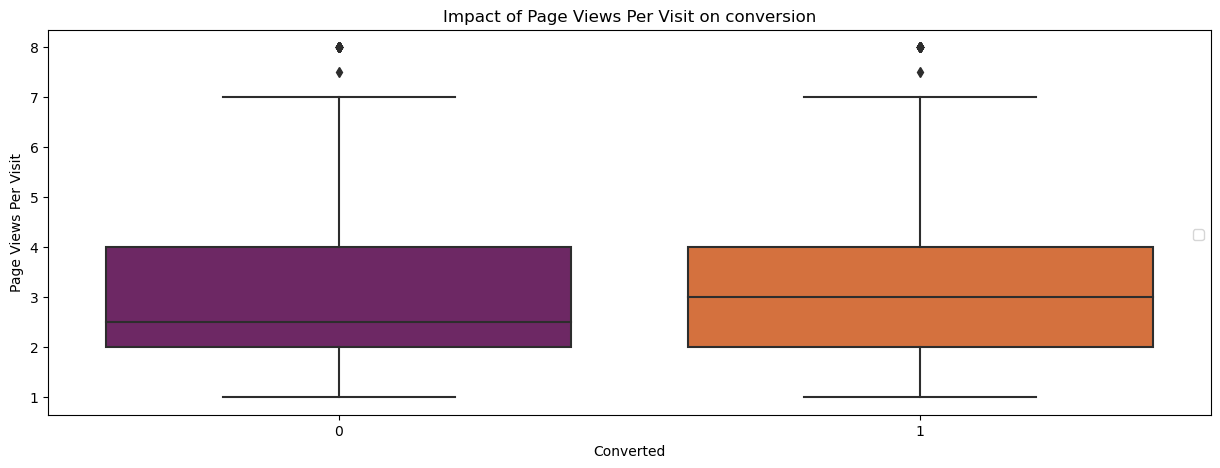

In [72]:
## Checking impact of Total Time Spent on Website on the conversion, does higher time leads to conversion

plt.figure(figsize=[15,5])
sns.boxplot(x='Converted',y='Page Views Per Visit',data=fl_final[fl_final['TotalVisits']>0],palette='inferno')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Impact of Page Views Per Visit on conversion')
plt.show()

Number of different page scrolled is not impacting the decision of being converted or not, which might attribute to that consumers have no clear cut information provided in multiple pages, It means that the ones who are spending mode time on the website and end up getting converted find content relevant

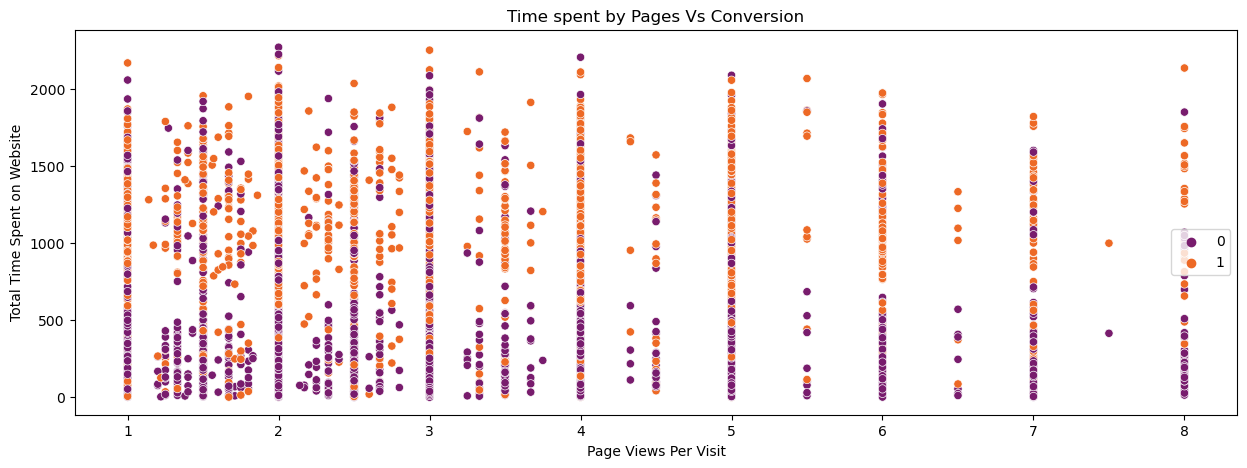

In [74]:
## We can see the relationship between Page per visit and time spent 
plt.figure(figsize=[15,5])
sns.scatterplot(x='Page Views Per Visit',y='Total Time Spent on Website',data=fl_final[fl_final['TotalVisits']>0],hue='Converted',palette='inferno')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Time spent by Pages Vs Conversion')
plt.show()

It can be seen that, higher the time spent in each page count, higher the number of conversions getting achieved, whole orange color is moved towards higher side while violet is towards lessers side.

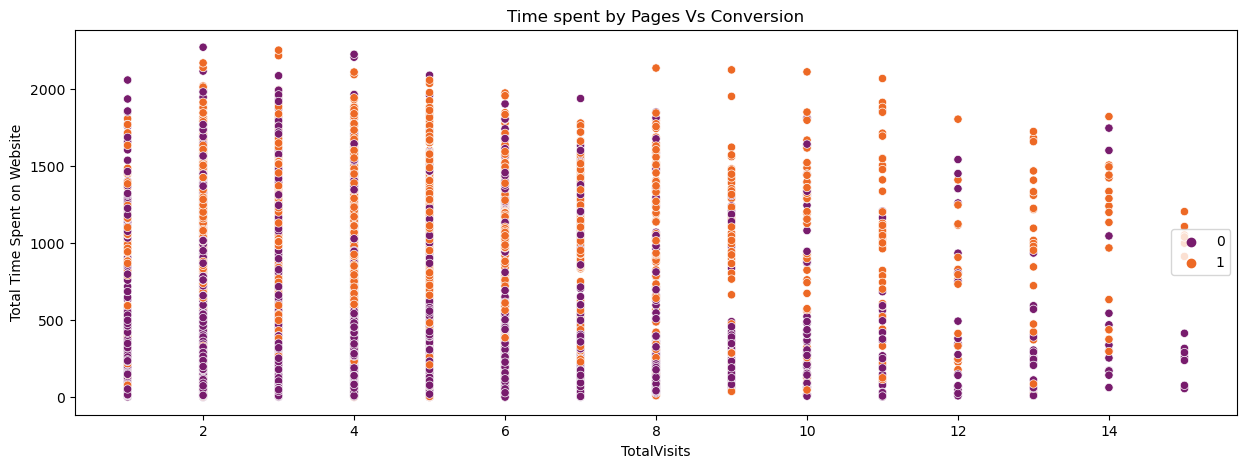

In [75]:
## We can see the relationship between Page per visit and time spent 
plt.figure(figsize=[15,5])
sns.scatterplot(x='TotalVisits',y='Total Time Spent on Website',data=fl_final[fl_final['TotalVisits']>0],hue='Converted',palette='inferno')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Time spent by Pages Vs Conversion')
plt.show()

In [76]:
conv_plot=fl_final.groupby(['Lead Source','Lead Origin']).agg({'Converted':'sum',
                                                                            'TotalVisits':'count'}).reset_index()
conv_plot['Conv_Rate']=conv_plot['Converted']/conv_plot['TotalVisits']*100

In [77]:
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8908 non-null   object 
 1   Lead Number                               8908 non-null   int64  
 2   Lead Origin                               8908 non-null   object 
 3   Lead Source                               8908 non-null   object 
 4   Do Not Email                              8908 non-null   object 
 5   Converted                                 8908 non-null   int64  
 6   TotalVisits                               8908 non-null   float64
 7   Total Time Spent on Website               8908 non-null   int64  
 8   Page Views Per Visit                      8908 non-null   float64
 9   Last Activity                             8908 non-null   object 
 10  Country                             

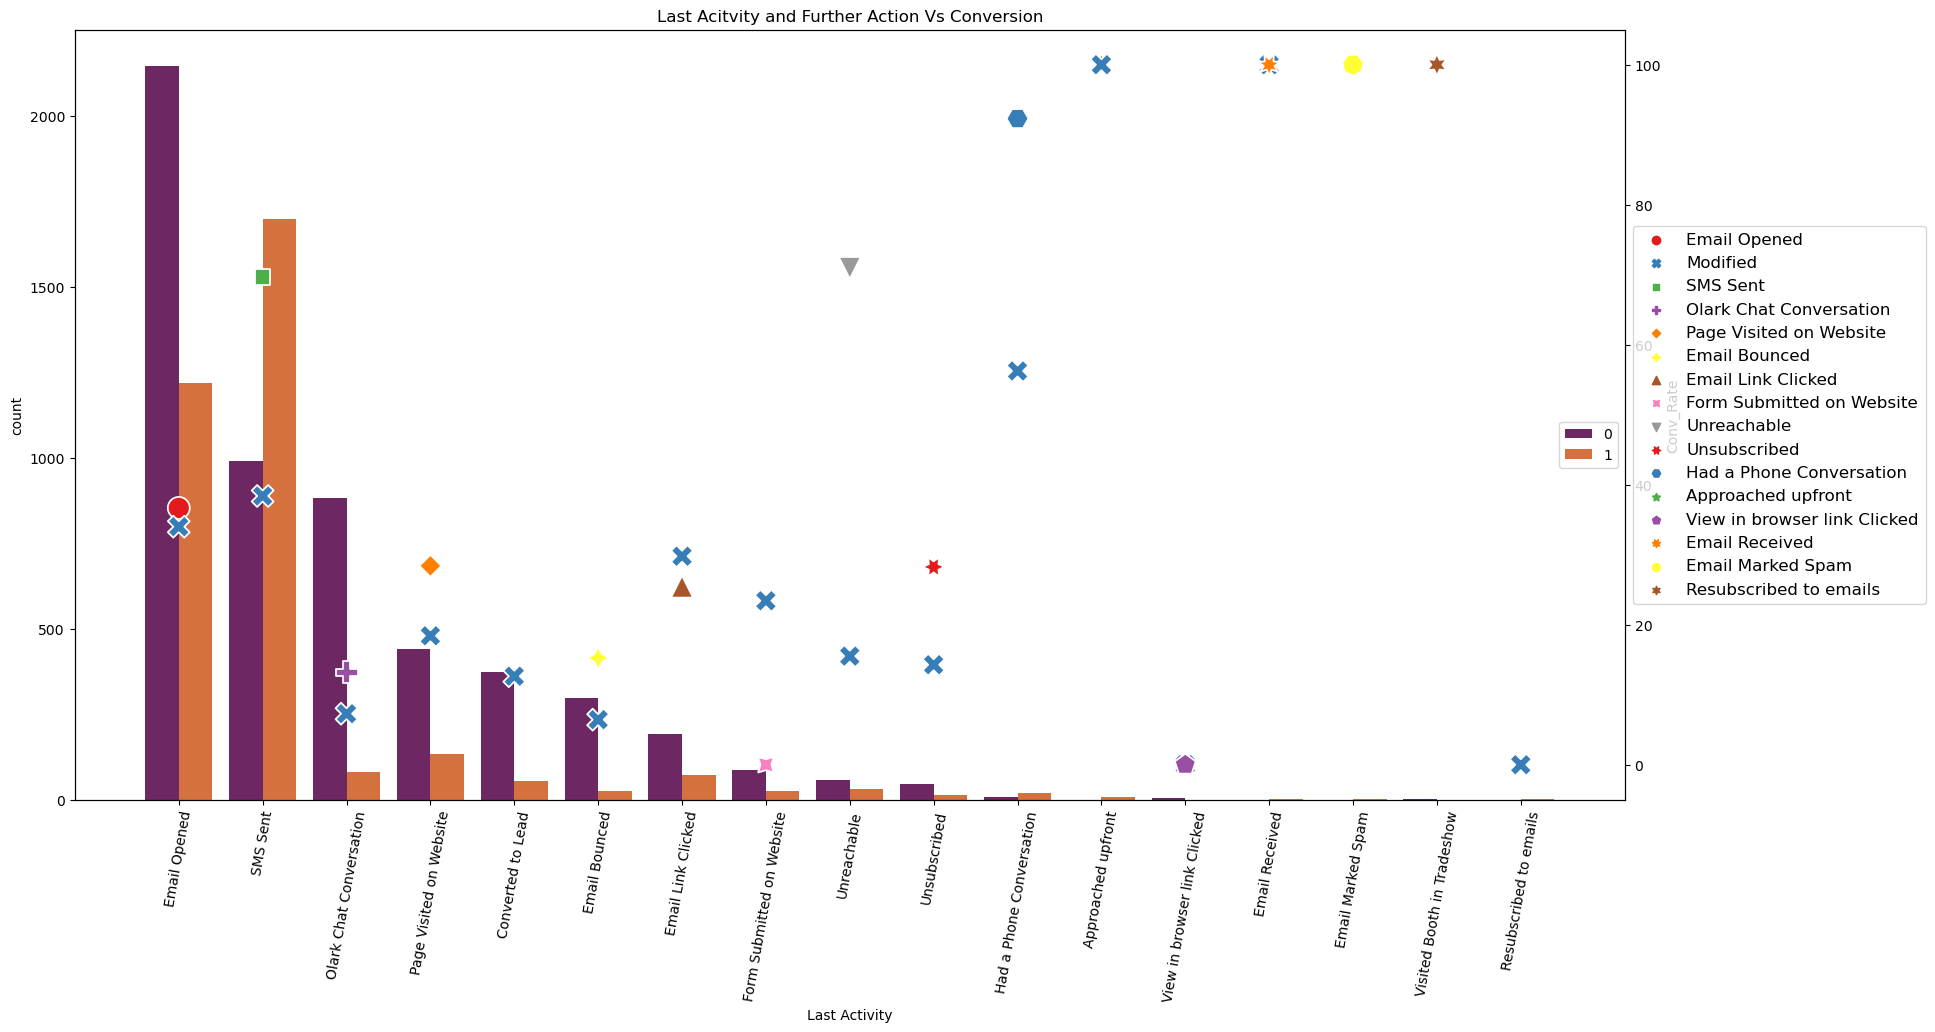

In [78]:
## Relationship of last activity albeit any change in action - with conversion
## Relationship between lead origin and source - and how it impacts the conversion
plt.figure(figsize=[20,10])
sns.countplot('Last Activity',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Last Activity'].value_counts().index)
plt.xticks(rotation = 80)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

ax2 = plt.twinx()

conv_plot=fl_final.groupby(['Last Activity','Last Notable Activity']).agg({'Converted':'sum',
                                                                            'TotalVisits':'count'}).reset_index()
conv_plot['Conv_Rate']=conv_plot['Converted']/conv_plot['TotalVisits']*100
conv_plot['Tot']=conv_plot.groupby('Last Activity')['TotalVisits'].transform(np.sum)
conv_plot=conv_plot.sort_values(by=['Tot'],ascending=False)

sns.scatterplot('Last Activity','Conv_Rate',data=conv_plot, hue='Last Notable Activity',
                ax=ax2,palette='Set1',s=250,style='Last Notable Activity')

plt.title('Last Acitvity and Further Action Vs Conversion')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':12})

plt.show()


SMS has the best conversion rate, more than 60% of the people conerted from SMS. Consumers whose last Activity is Modified, has lesser conversion, it might mean that customers opt out after their last activity. Approached Upfront has 100% conversion ,but volume is too low. Spams are quite counter intuitive, given their 100% conversion in both cases.

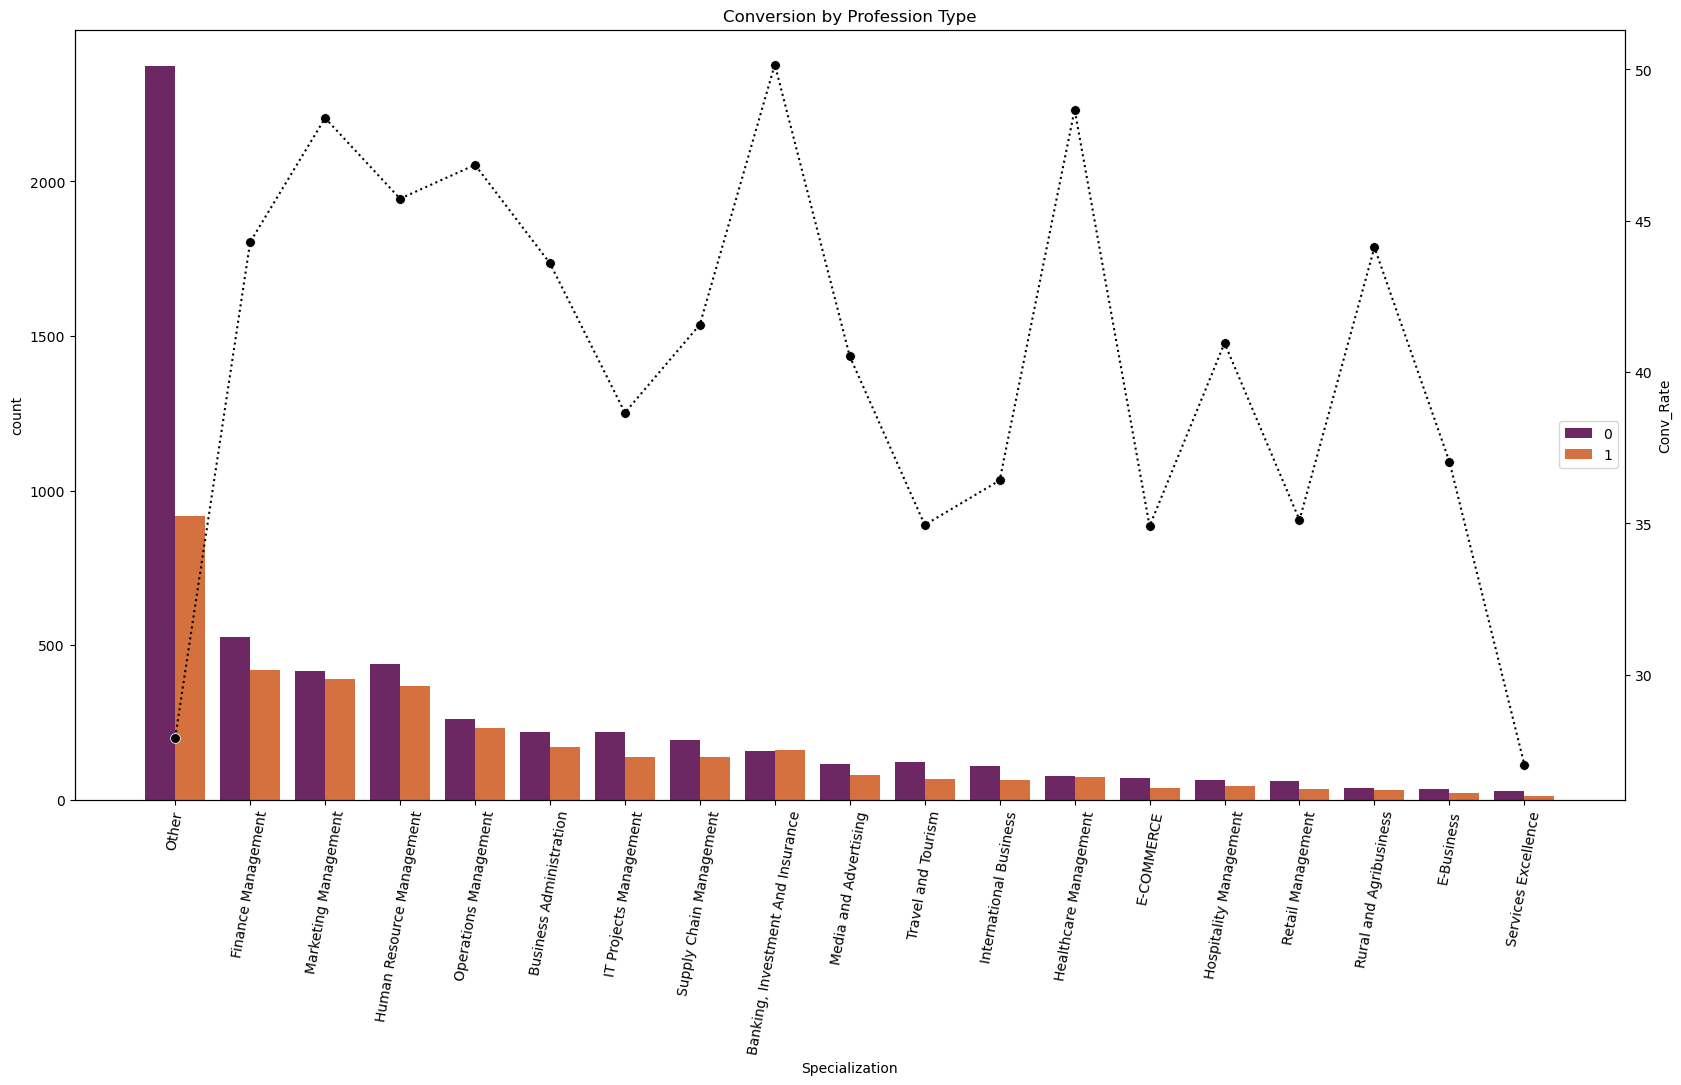

In [158]:
plt.figure(figsize=[20,10])
sns.countplot('Specialization',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Specialization'].value_counts().index)
plt.xticks(rotation = 80)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

ax2 = plt.twinx()

conv_plot=fl_final.groupby(['Specialization']).agg({'Converted':'sum',
                                                                            'TotalVisits':'count'}).reset_index()
conv_plot['Conv_Rate']=conv_plot['Converted']/conv_plot['TotalVisits']*100
conv_plot['Tot']=conv_plot.groupby('Specialization')['TotalVisits'].transform(np.sum)
conv_plot=conv_plot.sort_values(by=['Tot'],ascending=False)

sns.lineplot('Specialization','Conv_Rate',data=conv_plot,color='black',
                ax=ax2,linestyle=':')

sns.scatterplot('Specialization','Conv_Rate',data=conv_plot,color='black',
                ax=ax2,s=50)
plt.title('Conversion by Profession Type')
plt.show()

Professions in category of 'Others' - Which include business, students etc has highest number of conversions but its conversion rate is the least, Investment Banking and Insurance customers have best conversion rate followed by Healthcare, Finance and Marketing. Professional fields have a better choice to opt the course

In [80]:
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8908 non-null   object 
 1   Lead Number                               8908 non-null   int64  
 2   Lead Origin                               8908 non-null   object 
 3   Lead Source                               8908 non-null   object 
 4   Do Not Email                              8908 non-null   object 
 5   Converted                                 8908 non-null   int64  
 6   TotalVisits                               8908 non-null   float64
 7   Total Time Spent on Website               8908 non-null   int64  
 8   Page Views Per Visit                      8908 non-null   float64
 9   Last Activity                             8908 non-null   object 
 10  Country                             

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

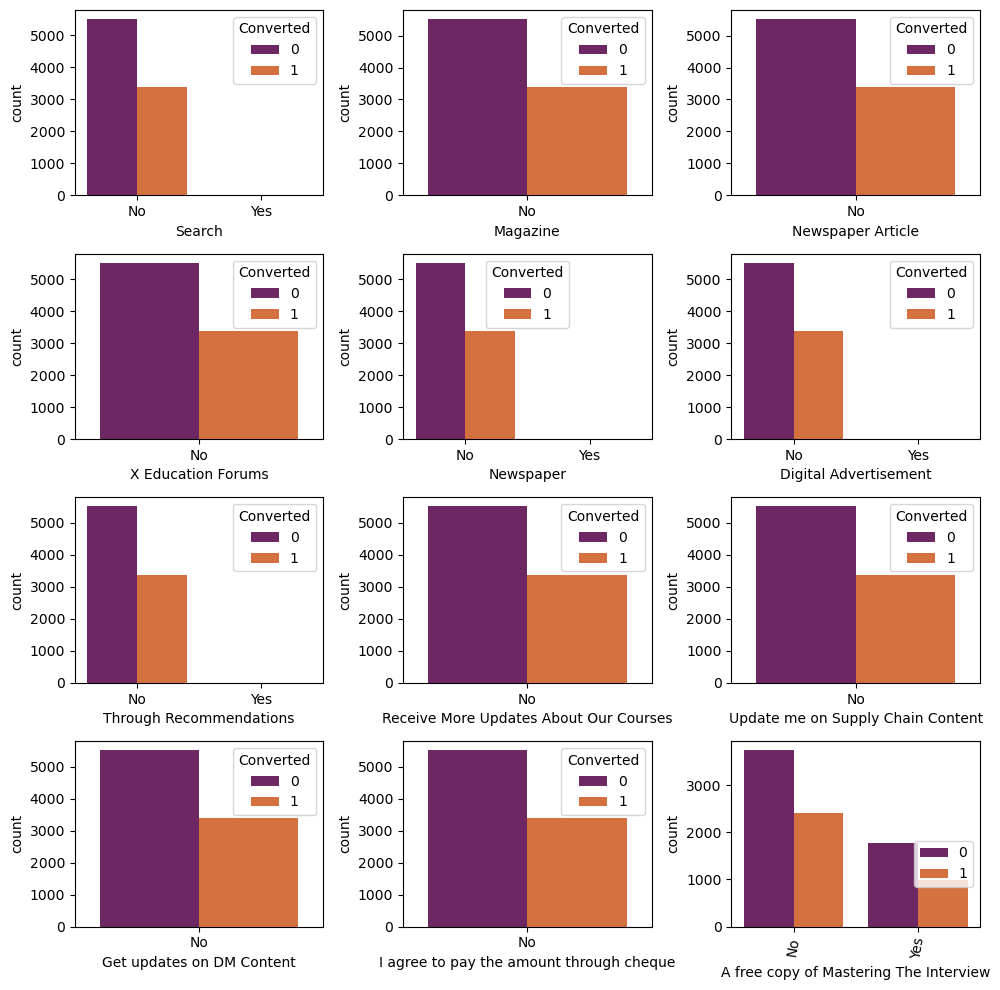

In [81]:
l=['Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

f, axes = plt.subplots(4, 3,figsize=(10,10))
counter=0
counter2=0
for i,col in enumerate(l):
    sns.countplot(col,hue='Converted',data=fl_final,palette='inferno',ax=axes[counter2,counter])
    plt.xticks(rotation = 80)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
    #plt.title('Impact of '+col+'  VS Conversion')
    counter+=1
    if counter>2:
        counter=0
        counter2+=1
        
plt.tight_layout()


Only the ones choosing Mastering the interview has different conversion rate, rest of the columns does not add much of a value to the analysis, given they have only No values in it majorly so we can drop all these 

In [82]:
fl_final.drop(columns=[ 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque'],inplace=True)
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8908 non-null   object 
 1   Lead Number                             8908 non-null   int64  
 2   Lead Origin                             8908 non-null   object 
 3   Lead Source                             8908 non-null   object 
 4   Do Not Email                            8908 non-null   object 
 5   Converted                               8908 non-null   int64  
 6   TotalVisits                             8908 non-null   float64
 7   Total Time Spent on Website             8908 non-null   int64  
 8   Page Views Per Visit                    8908 non-null   float64
 9   Last Activity                           8908 non-null   object 
 10  Country                                 8908 non-null   obje

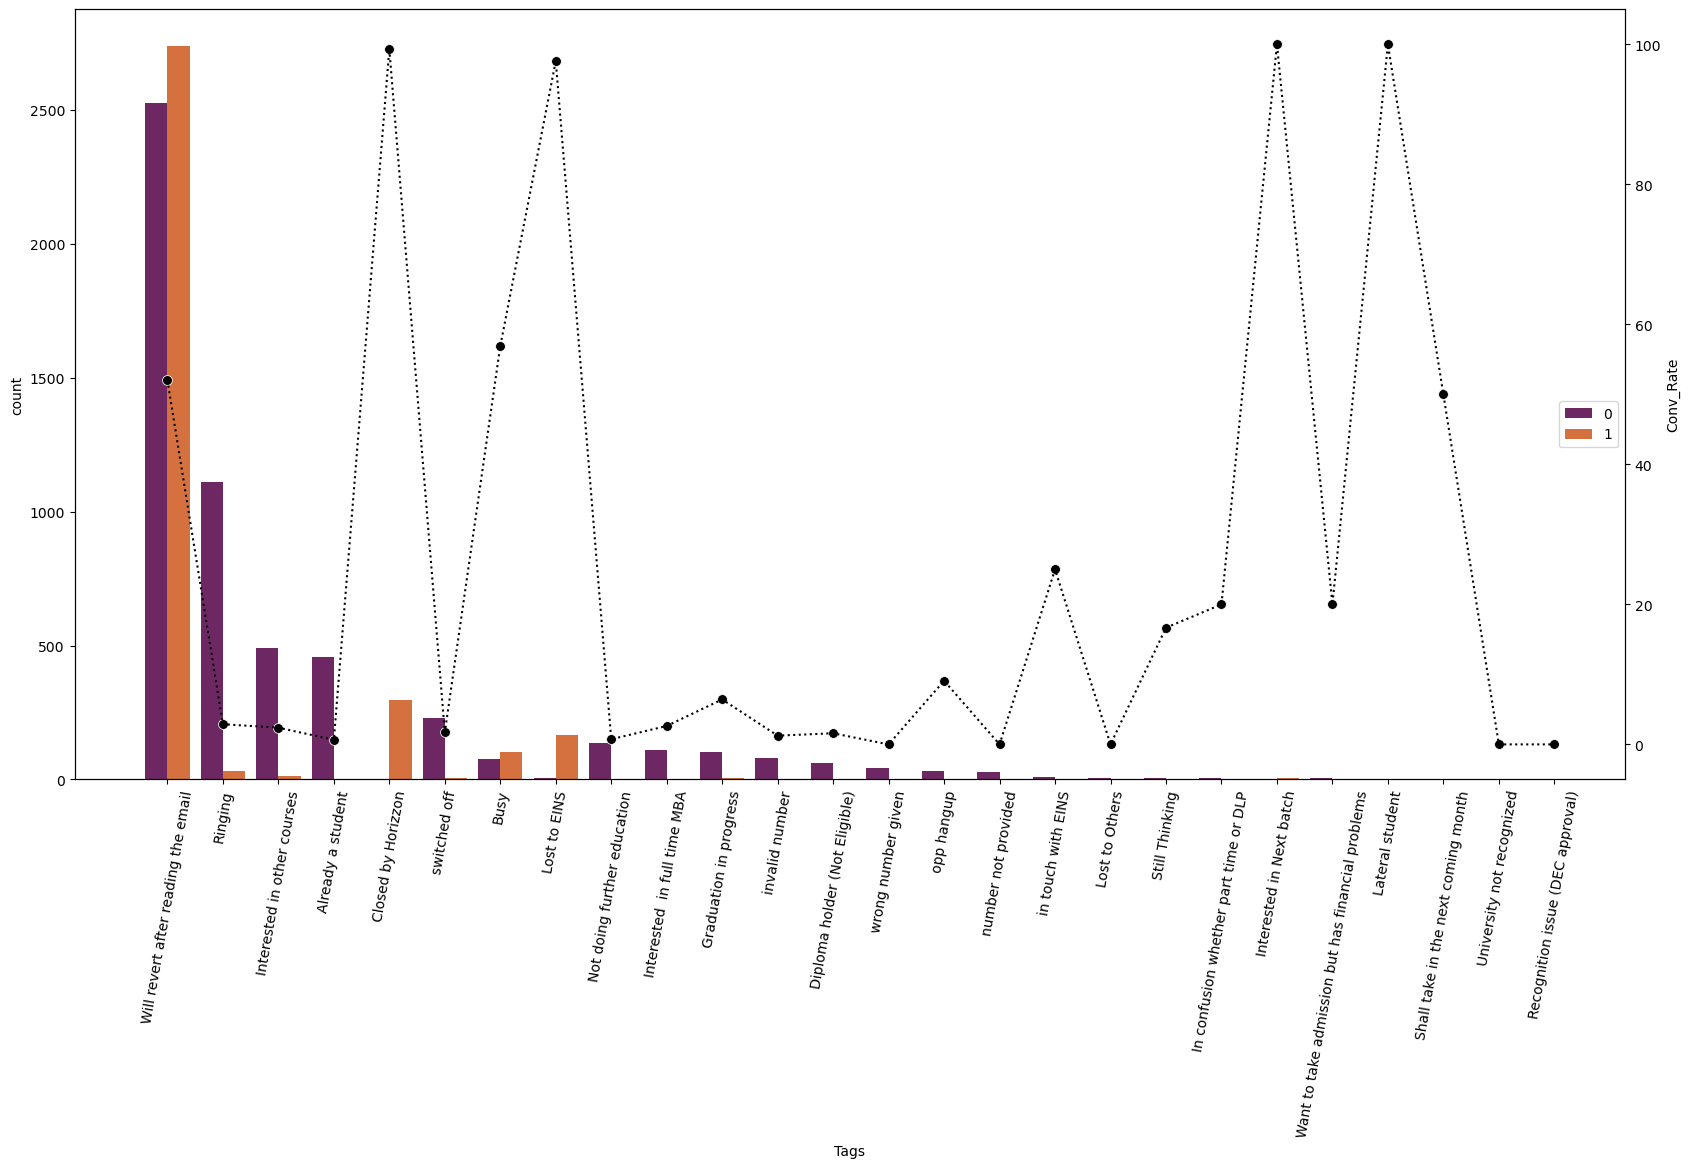

In [83]:
plt.figure(figsize=[20,10])
sns.countplot('Tags',hue='Converted',data=fl_final,palette='inferno',
              order = fl_final['Tags'].value_counts().index)
plt.xticks(rotation = 80)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

ax2 = plt.twinx()

conv_plot=fl_final.groupby(['Tags']).agg({'Converted':'sum',
                                                                            'TotalVisits':'count'}).reset_index()
conv_plot['Conv_Rate']=conv_plot['Converted']/conv_plot['TotalVisits']*100
conv_plot['Tot']=conv_plot.groupby('Tags')['TotalVisits'].transform(np.sum)
conv_plot=conv_plot.sort_values(by=['Tot'],ascending=False)

sns.lineplot('Tags','Conv_Rate',data=conv_plot,color='black',
                ax=ax2,linestyle=':')

sns.scatterplot('Tags','Conv_Rate',data=conv_plot,color='black',
                ax=ax2,s=50)
plt.show()

Lost to EINS and Closed by Horizon has higher conversion rate, close to 100%. Most of the people have tags 'Will revert after the email', around 50%, while rest of the tags do not have any conversion happening. Students and the people not reachable definitely does not want to have a course. Since this column is tagged by sales team for their understanding , will portray the real behaviour of the user so we can drop this column

In [84]:
fl_final.drop(columns=[ 'Tags'],inplace=True)

In [85]:
fl_final.drop(columns=[ 'Lead Number'],inplace=True)

In [86]:
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8908 non-null   object 
 1   Lead Origin                             8908 non-null   object 
 2   Lead Source                             8908 non-null   object 
 3   Do Not Email                            8908 non-null   object 
 4   Converted                               8908 non-null   int64  
 5   TotalVisits                             8908 non-null   float64
 6   Total Time Spent on Website             8908 non-null   int64  
 7   Page Views Per Visit                    8908 non-null   float64
 8   Last Activity                           8908 non-null   object 
 9   Country                                 8908 non-null   object 
 10  Specialization                          8908 non-null   obje

In [87]:
## Filling Binary columns with 0 and 1 values
binary_cols= [col for col in fl_final.columns if len(fl_final[col].unique())==2]
binary_cols

['Do Not Email',
 'Converted',
 'Search',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Action_Change']

In [88]:
fl_final[binary_cols].drop_duplicates()

,Do Not Email,Converted,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Action_Change
0,No,0,No,No,No,No,No,1
1,No,0,No,No,No,No,No,0
2,No,1,No,No,No,No,Yes,0
4,No,1,No,No,No,No,No,1
8,No,0,No,No,No,No,Yes,0
14,Yes,0,No,No,No,No,No,0
15,No,1,No,No,No,No,No,0
34,No,1,No,No,No,No,Yes,1
41,Yes,0,No,No,No,No,Yes,0
52,No,0,No,No,No,No,Yes,1


In [89]:
fl_final.Search = fl_final.Search.map(dict(Yes=1, No=0))
fl_final['No_Email'] = fl_final['Do Not Email'].map(dict(Yes=1, No=0))
fl_final.Newspaper = fl_final.Newspaper.map(dict(Yes=1, No=0))
fl_final['Digital_Advertisements'] = fl_final['Digital Advertisement'].map(dict(Yes=1, No=0))
fl_final['Through_Recommendations'] = fl_final['Through Recommendations'].map(dict(Yes=1, No=0))
fl_final['Interview_Master_Tag'] = fl_final['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))


In [90]:
fl_final.drop(columns=['Do Not Email',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
  'Last Notable Activity'],inplace=True)

In [91]:
fl_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  8908 non-null   object 
 1   Lead Origin                  8908 non-null   object 
 2   Lead Source                  8908 non-null   object 
 3   Converted                    8908 non-null   int64  
 4   TotalVisits                  8908 non-null   float64
 5   Total Time Spent on Website  8908 non-null   int64  
 6   Page Views Per Visit         8908 non-null   float64
 7   Last Activity                8908 non-null   object 
 8   Country                      8908 non-null   object 
 9   Specialization               8908 non-null   object 
 10  Search                       8908 non-null   int64  
 11  Newspaper                    8908 non-null   int64  
 12  Action_Change                8908 non-null   int64  
 13  No_Email          

In [92]:
## create dummy columns for the categoricals 
dummy_data = pd.get_dummies(fl_final[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                       'Country']], drop_first=True)
dummy_data.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blogs,Lead Source_ChatBots,Lead Source_Direct Traffic,Lead Source_Referrals,Lead Source_Search,Lead Source_SocialMedia,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data_model = pd.concat([fl_final, dummy_data], axis=1)
data_model.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,ChatBots,0,0.0,0,0.0,Page Visited on Website,India,Other,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Search,0,5.0,674,2.5,Email Opened,India,Other,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Search,1,2.0,1428,1.0,Converted to Lead,India,Other,...,0,0,0,0,0,0,0,0,0,0


In [94]:
## dropping the dummy columns - base 
data_model.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                       'Country'],inplace=True)

In [95]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 9239
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Prospect ID                                 8908 non-null   object 
 1   Converted                                   8908 non-null   int64  
 2   TotalVisits                                 8908 non-null   float64
 3   Total Time Spent on Website                 8908 non-null   int64  
 4   Page Views Per Visit                        8908 non-null   float64
 5   Search                                      8908 non-null   int64  
 6   Newspaper                                   8908 non-null   int64  
 7   Action_Change                               8908 non-null   int64  
 8   No_Email                                    8908 non-null   int64  
 9   Digital_Advertisements                      8908 non-null   int64  
 10  Through_Reco

In [96]:
### Test and train 
X=data_model.drop(columns=['Prospect ID','Converted'],axis=1)
y=data_model['Converted']

In [97]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Action_Change,No_Email,Digital_Advertisements,Through_Recommendations,Interview_Master_Tag,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0.0,0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [99]:
## scaling the numeric part for better understanding 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Action_Change,No_Email,Digital_Advertisements,Through_Recommendations,Interview_Master_Tag,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
3628,-0.380084,2.238965,-0.121634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3593,0.341653,-0.334386,0.967669,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4633,-0.380084,2.308713,-0.121634,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
964,0.341653,1.952629,0.967669,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8933,-0.380084,1.886551,-0.121634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building the first Logistic Model using all the variables

In [100]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6235
Model:                            GLM   Df Residuals:                     6145
Model Family:                Binomial   Df Model:                           89
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.0
Date:                Sat, 17 Jun 2023   Deviance:                       5298.0
Time:                        13:21:52   Pearson chi2:                 6.73e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         44.9775   1.32e+05      0.000      1.000   -2.59e+05    2.59e+05
TotalVisits                                    0.2346      0.052      4.503      0.000       0.132       0.337
Total Time Spent on Website                    1.0681      0.040     26.439      0.000       0.989       1.147
Page Views Per Visit                          -0.2551      0.058     -4.427      0.000      -0.368      -0.142
Search                                        -0.6426      0.835     -0.770      0.441      -2.279       0.994
Newspaper                                   1.967e-08      0.000      0.000      1.000      -0.000       0.000
Action_Change                                 -0.7352      0.090     -8.184      0.000      -0.911      -0.559
No_Email                                      -1.3363      0.213     -6.265      0.000      -1.754      -0.918
Digital_Advertisements                         0.0651      1.452      0.045      0.964      -2.782       2.912
Through_Recommendations                        2.3221      1.344      1.727      0.084      -0.313       4.957
Interview_Master_Tag                          -0.3061      0.103     -2.971      0.003      -0.508      -0.104
Lead Origin_Landing Page Submission           -1.0342      0.137     -7.570      0.000      -1.302      -0.766
Lead Origin_Lead Add Form                      3.8410      0.387      9.937      0.000       3.083       4.599
Lead Origin_Lead Import                       -1.3776      1.599     -0.861      0.389      -4.512       1.757
Lead Origin_Quick Add Form                    23.4894   1.33e+05      0.000      1.000    -2.6e+05     2.6e+05
Lead Source_Blogs                             26.7159   1.22e+05      0.000      1.000   -2.38e+05    2.38e+05
Lead Source_ChatBots                           3.7735      1.432      2.636      0.008       0.968       6.579
Lead Source_Direct Traffic                     2.6216      1.430      1.833      0.067      -0.182       5.425
Lead Source_Referrals                          2.7031      1.393      1.940      0.052      -0.028       5.434
Lead Source_Search                             2.7306      1.427      1.914      0.056      -0.066       5.527
Lead Source_SocialMedia                        4.4935      2.088      2.152      0.031       0.400       8.587
Last Activity_Converted to Lead              -25.4596   3.65e+04     -0.001      0.999   -7.16e+04    7.16e+04
Last Activity_Email Bounced                  -25.5989   3.65e+04     -0.001      0.999   -7.16e+04    7.16e+04
Last Activity_Email Link Clicked             -25.5132   3.65e+04     -0.001      0.999   -7.16e+04    7.16e+04
Last Activity_Email Marked Spam               -2.0840   1.59e+05  -1.31e-05      1.000

The first model has too many variables which does not have any reliable P-value coefficients, so we can start removing these variables from the model. Lets use RFE to start with.

### RFE Modeling

In [101]:
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=20)         
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [103]:
rfe_df=pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_df[rfe_df[1]==True]

,0,1,2
1,Total Time Spent on Website,True,1
5,Action_Change,True,1
6,No_Email,True,1
8,Through_Recommendations,True,1
10,Lead Origin_Landing Page Submission,True,1
11,Lead Origin_Lead Add Form,True,1
15,Lead Source_ChatBots,True,1
20,Last Activity_Converted to Lead,True,1
21,Last Activity_Email Bounced,True,1
26,Last Activity_Form Submitted on Website,True,1


In [104]:
# Viewing columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Action_Change', 'No_Email',
       'Through_Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_ChatBots',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Other', 'Country_Italy', 'Country_Netherlands',
       'Country_Nigeria', 'Country_Oman', 'Country_Saudi Arabia'],
      dtype='object')

From the analysis too, it can be seen that It has chosen the columns which had more impact during the EDA, we can build second model on this data.

In [105]:
X_train_sm2 = sm.add_constant(X_train[rfe_cols])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
result2 = logm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6235
Model:                            GLM   Df Residuals:                     6214
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.5
Date:                Sat, 17 Jun 2023   Deviance:                       5405.0
Time:                        13:22:12   Pearson chi2:                 6.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1525      0.125      1.219      0.223      -0.093       0.398
Total Time Spent on Website                 1.0750      0.040     27.118      0.000       0.997       1.153
Action_Change                              -0.7189      0.087     -8.224      0.000      -0.890      -0.548
No_Email                                   -1.2816      0.190     -6.758      0.000      -1.653      -0.910
Through_Recommendations                     2.2264      1.228      1.813      0.070      -0.181       4.634
Lead Origin_Landing Page Submission        -1.2439      0.126     -9.846      0.000      -1.492      -0.996
Lead Origin_Lead Add Form                   3.8466      0.216     17.787      0.000       3.423       4.270
Lead Source_ChatBots                        1.0939      0.122      8.990      0.000       0.855       1.332
Last Activity_Converted to Lead            -0.3099      0.209     -1.486      0.137      -0.719       0.099
Last Activity_Email Bounced                -0.4414      0.355     -1.244      0.214      -1.137       0.254
Last Activity_Form Submitted on Website    -0.3775      0.344     -1.099      0.272      -1.051       0.296
Last Activity_Had a Phone Conversation      2.1458      0.616      3.482      0.000       0.938       3.354
Last Activity_Olark Chat Conversation      -1.0189      0.172     -5.935      0.000      -1.355      -0.682
Last Activity_Page Visited on Website      -0.3692      0.156     -2.374      0.018      -0.674      -0.064
Last Activity_SMS Sent                      1.3048      0.077     17.007      0.000       1.154       1.455
Specialization_Other                       -1.4750      0.123    -11.972      0.000      -1.716      -1.234
Country_Italy                             -24.0080    2.7e+04     -0.001      0.999    -5.3e+04     5.3e+04
Country_Netherlands                       -24.4583   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Country_Nigeria                           -22.2981   2.35e+04     -0.001      0.999   -4.61e+04     4.6e+04
Country_Oman                                2.2090      1.275      1.733      0.083      -0.290       4.707
Country_Saudi Arabia                       -1.9286      0.980     -1.967      0.049      -3.850      -0.007
===========================================================================================================
"""

In [106]:
## Columns like country is not adding any coefficient weightage to the above, we can check the VIF and remove these

In [107]:
# Check for the VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Action_Change,2.24
14,Specialization_Other,2.17
6,Lead Source_ChatBots,2.04
8,Last Activity_Email Bounced,1.94
2,No_Email,1.88
4,Lead Origin_Landing Page Submission,1.80
11,Last Activity_Olark Chat Conversation,1.74
13,Last Activity_SMS Sent,1.68
7,Last Activity_Converted to Lead,1.31
0,Total Time Spent on Website,1.27


It can be seen from the above that VIF is in range so we can remove the columns with High coefficients.

In [108]:
## removing Country Italy and Netherlans from the data 
rfe_cols=rfe_cols.drop(['Country_Italy','Country_Netherlands'])

In [109]:
## Generating the 3rd model
X_train_sm3 = sm.add_constant(X_train[rfe_cols])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
result3 = logm3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6235
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.5
Date:                Sat, 17 Jun 2023   Deviance:                       5415.1
Time:                        13:22:13   Pearson chi2:                 6.64e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1539      0.125      1.231      0.218      -0.091       0.399
Total Time Spent on Website                 1.0709      0.040     27.073      0.000       0.993       1.148
Action_Change                              -0.7153      0.087     -8.190      0.000      -0.886      -0.544
No_Email                                   -1.2763      0.189     -6.735      0.000      -1.648      -0.905
Through_Recommendations                     2.2253      1.228      1.813      0.070      -0.181       4.632
Lead Origin_Landing Page Submission        -1.2450      0.126     -9.864      0.000      -1.492      -0.998
Lead Origin_Lead Add Form                   3.8431      0.216     17.780      0.000       3.419       4.267
Lead Source_ChatBots                        1.0908      0.122      8.977      0.000       0.853       1.329
Last Activity_Converted to Lead            -0.3121      0.208     -1.498      0.134      -0.721       0.096
Last Activity_Email Bounced                -0.4461      0.355     -1.258      0.208      -1.141       0.249
Last Activity_Form Submitted on Website    -0.3796      0.343     -1.105      0.269      -1.053       0.293
Last Activity_Had a Phone Conversation      2.1442      0.616      3.481      0.001       0.937       3.352
Last Activity_Olark Chat Conversation      -1.0215      0.172     -5.954      0.000      -1.358      -0.685
Last Activity_Page Visited on Website      -0.3691      0.155     -2.375      0.018      -0.674      -0.064
Last Activity_SMS Sent                      1.2968      0.077     16.931      0.000       1.147       1.447
Specialization_Other                       -1.4748      0.123    -11.981      0.000      -1.716      -1.234
Country_Nigeria                           -21.2905   1.43e+04     -0.001      0.999    -2.8e+04    2.79e+04
Country_Oman                                2.2074      1.274      1.732      0.083      -0.290       4.705
Country_Saudi Arabia                       -1.9210      0.980     -1.961      0.050      -3.841      -0.001
===========================================================================================================
"""

In [110]:
## removing Country Oman
rfe_cols=rfe_cols.drop(['Country_Oman','Country_Nigeria','Last Activity_Form Submitted on Website'])

## Generating the 4th model
X_train_sm4 = sm.add_constant(X_train[rfe_cols])
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
result4 = logm4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6235
Model:                            GLM   Df Residuals:                     6219
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.4
Date:                Sat, 17 Jun 2023   Deviance:                       5422.9
Time:                        13:22:13   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1384      0.124      1.117      0.264      -0.105       0.381
Total Time Spent on Website                1.0702      0.040     27.086      0.000       0.993       1.148
Action_Change                             -0.7326      0.085     -8.589      0.000      -0.900      -0.565
No_Email                                  -1.2740      0.189     -6.723      0.000      -1.645      -0.903
Through_Recommendations                    2.2269      1.228      1.813      0.070      -0.180       4.634
Lead Origin_Landing Page Submission       -1.2340      0.126     -9.830      0.000      -1.480      -0.988
Lead Origin_Lead Add Form                  3.8483      0.216     17.816      0.000       3.425       4.272
Lead Source_ChatBots                       1.0893      0.121      8.968      0.000       0.851       1.327
Last Activity_Converted to Lead           -0.2736      0.206     -1.326      0.185      -0.678       0.131
Last Activity_Email Bounced               -0.4330      0.354     -1.222      0.222      -1.127       0.261
Last Activity_Had a Phone Conversation     2.1560      0.616      3.501      0.000       0.949       3.363
Last Activity_Olark Chat Conversation     -1.0069      0.171     -5.897      0.000      -1.342      -0.672
Last Activity_Page Visited on Website     -0.3569      0.155     -2.305      0.021      -0.660      -0.053
Last Activity_SMS Sent                     1.3011      0.076     17.075      0.000       1.152       1.450
Specialization_Other                      -1.4579      0.122    -11.932      0.000      -1.697      -1.218
Country_Saudi Arabia                      -1.9189      0.978     -1.962      0.050      -3.836      -0.002
==========================================================================================================
"""

In [111]:
## removing Through Recommendation
rfe_cols=rfe_cols.drop(['Through_Recommendations','Last Activity_Converted to Lead','Last Activity_Email Bounced'])

## Generating the 5th model
X_train_sm5 = sm.add_constant(X_train[rfe_cols])
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
result5 = logm5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6235
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.9
Date:                Sat, 17 Jun 2023   Deviance:                       5429.7
Time:                        13:22:13   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1307      0.124      1.058      0.290      -0.112       0.373
Total Time Spent on Website                1.0682      0.039     27.091      0.000       0.991       1.146
Action_Change                             -0.7865      0.079     -9.893      0.000      -0.942      -0.631
No_Email                                  -1.3863      0.164     -8.434      0.000      -1.708      -1.064
Lead Origin_Landing Page Submission       -1.2343      0.125     -9.850      0.000      -1.480      -0.989
Lead Origin_Lead Add Form                  3.8650      0.215     17.938      0.000       3.443       4.287
Lead Source_ChatBots                       1.1009      0.121      9.093      0.000       0.864       1.338
Last Activity_Had a Phone Conversation     2.1913      0.616      3.560      0.000       0.985       3.398
Last Activity_Olark Chat Conversation     -0.9599      0.169     -5.689      0.000      -1.291      -0.629
Last Activity_Page Visited on Website     -0.3073      0.153     -2.011      0.044      -0.607      -0.008
Last Activity_SMS Sent                     1.3283      0.074     17.851      0.000       1.182       1.474
Specialization_Other                      -1.4683      0.122    -12.038      0.000      -1.707      -1.229
Country_Saudi Arabia                      -1.9564      0.974     -2.009      0.045      -3.865      -0.047
==========================================================================================================
"""

In [112]:
## The Log Likelihood value has decreased from -2500 to -2717 by the time we reached 5th model, the mower the value
## for log likelihood the better the model.

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for final check
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Other,2.12
5,Lead Source_ChatBots,2.02
1,Action_Change,1.78
3,Lead Origin_Landing Page Submission,1.75
7,Last Activity_Olark Chat Conversation,1.60
9,Last Activity_SMS Sent,1.57
0,Total Time Spent on Website,1.27
4,Lead Origin_Lead Add Form,1.20
2,No_Email,1.13
8,Last Activity_Page Visited on Website,1.13


In [114]:
## Predict for the training data , and calculate the goodness metrics of this model. 
y_train_pred = result5.predict(X_train_sm5)
y_train_pred[:10]

3628    0.783835
3593    0.188350
4633    0.796192
964     0.727562
8933    0.903783
4114    0.772427
7474    0.038212
5453    0.901891
2185    0.179234
1655    0.757882
dtype: float64

In [115]:
## Joining the pred values with Y train
y_train

3628    0
3593    0
4633    1
964     1
8933    1
       ..
5948    0
5375    0
5587    0
918     1
7543    0
Name: Converted, Length: 6235, dtype: int64

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3628,0,0.783835,3628
3593,0,0.188350,3593
4633,1,0.796192,4633
964,1,0.727562,964
8933,1,0.903783,8933


In [117]:
## Convert the probability for threshold using 0.5 
y_train_pred_final['pred_class']=np.where(y_train_pred_final['Converted_prob']>0.5,1,0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,pred_class
3628,0,0.783835,3628,1
3593,0,0.188350,3593,0
4633,1,0.796192,4633,1
964,1,0.727562,964,1
8933,1,0.903783,8933,1


In [118]:
## Calculating the accuracy metrics and judging the model. 

## Making confustion matrix 
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_class)
print(confusion)

[[3386  488]
 [ 748 1613]]


In [119]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_class))

Accuracy : 0.8017642341619887


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
print('Sensistivity : '+str(TP/(TP+FN)))

## Around 70% of the cases , model is able to predict the conversion correctly

Sensistivity : 0.6831850910631089


In [122]:
print('Specificity : '+str(TN/(TN+FP)))

## Around 90% of the cases model is able to predict correctly which will not convert

Specificity : 0.8740320082601962


In [123]:
print('Precision : '+str(TP/(TP+FP)))

## Model is quite precise given more than 70% of its predictions are correct for conversion.

Precision : 0.7677296525464065


In [124]:
# 
print('Negative predictive value : '+str(TN/(TN+FN)))

Negative predcitive value : 0.8190614417029511


In [125]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [127]:
y_true = np.array(y_train_pred_final['Converted'])
y_scores = np.array(y_train_pred_final['Converted_prob'])
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)


[0.00000000e+00 4.23549343e-04 3.81194409e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.98735157 0.98941662 1.        ]
[1.99926417 0.99926417 0.99763828 ... 0.01342781 0.01332172 0.00241604]


In [128]:
print(roc_auc_score(y_true, y_scores))

0.8718356523589207


In [129]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.26974626089323117

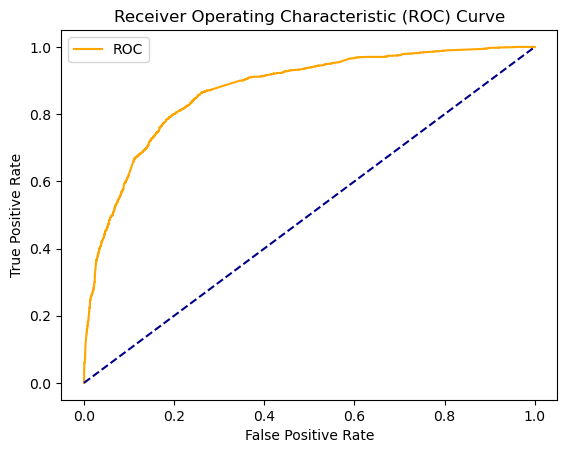

In [130]:
plot_roc_curve(fpr, tpr)

In [131]:
# Let's create columns with different probability cutoffs, just to see if this co-incides for the above optimal
# as we calculated
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,pred_class,0.0,0.05,0.1,0.15,0.2,0.25,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
3628,0,0.783835,3628,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
3593,0,0.188350,3593,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4633,1,0.796192,4633,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
964,1,0.727562,964,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
8933,1,0.903783,8933,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [132]:
## Making a cutoff df for all the the probabilities as we calculated
cutoff_df=pd.DataFrame(columns=['prob','acc','sensi','speci'])
num = [float(x)/20 for x in range(20)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob       acc     sensi     speci
0.00  0.00  0.378669  1.000000  0.000000
0.05  0.05  0.447153  0.994494  0.113578
0.10  0.10  0.571451  0.971622  0.327568
0.15  0.15  0.667843  0.937738  0.503356
0.20  0.20  0.721732  0.912325  0.605576
0.25  0.25  0.781716  0.869123  0.728446
0.30  0.30  0.789415  0.843710  0.756324
0.35  0.35  0.798877  0.805167  0.795044
0.40  0.40  0.804330  0.764930  0.828343
0.45  0.45  0.802727  0.720034  0.853123
0.50  0.50  0.801764  0.683185  0.874032
0.55  0.55  0.792622  0.608640  0.904750
0.60  0.60  0.782358  0.556544  0.919979
0.65  0.65  0.775621  0.518424  0.932370
0.70  0.70  0.766800  0.474375  0.945018
0.75  0.75  0.757819  0.433291  0.955601
0.80  0.80  0.745309  0.376959  0.969799
0.85  0.85  0.714996  0.282507  0.978575
0.90  0.90  0.696231  0.217281  0.988126
0.95  0.95  0.663512  0.117323  0.996386


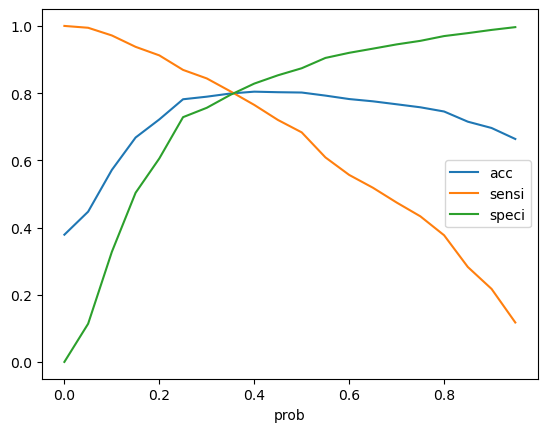

In [133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['acc','sensi','speci'])
plt.show()

In [134]:
## From this methodology it can be seen that 0.35 is equally good for specificity and sensitivity, so we can use 
## this threshold
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,pred_class,0.0,0.05,0.1,0.15,0.2,0.25,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
3628,0,0.783835,3628,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
3593,0,0.188350,3593,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4633,1,0.796192,4633,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
964,1,0.727562,964,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,1
8933,1,0.903783,8933,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [135]:
## Training data Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,pred_class,0.0,0.05,0.1,0.15,0.2,0.25,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted,Lead_Score
3628,0,0.783835,3628,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,78
3593,0,0.188350,3593,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,19
4633,1,0.796192,4633,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,80
964,1,0.727562,964,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,73
8933,1,0.903783,8933,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,90


In [136]:
## Precison & Recall of the final model
from sklearn.metrics import precision_score, recall_score

print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision : 0.7053803339517625
Recall : 0.8051673019906819


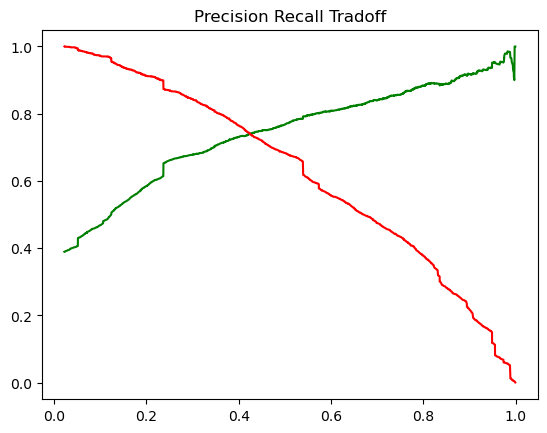

In [137]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Tradoff')
plt.show()

In [138]:
## Predictions on the test data 

## Scaling the numeric variables 
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [139]:
# Choosing the columns selected by the final model to the X_test 
X_test = X_test[rfe_cols]
X_test.head()

,Total Time Spent on Website,Action_Change,No_Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_ChatBots,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Other,Country_Saudi Arabia
677,-0.220586,1,1,1,0,0,0,0,0,0,0,0
4374,2.187571,0,0,1,0,0,0,0,0,0,0,0
6042,-0.868512,1,0,0,0,0,0,0,0,0,1,0
8147,2.439032,1,0,1,0,0,0,0,0,0,0,0
2435,-0.716167,1,0,1,0,0,0,0,0,0,0,0


In [140]:
# Adding a const to the test data
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set using the final model decided 
y_test_pred = result5.predict(X_test_sm)
y_test_pred[:10]

677     0.028975
4374    0.774388
6042    0.045139
8147    0.671594
2435    0.065678
5848    0.198754
9231    0.488230
1622    0.069083
3591    0.121206
9142    0.161892
dtype: float64

In [141]:
y_test_df=pd.DataFrame(y_test)
y_test_df

,Converted
677,0
4374,1
6042,0
8147,0
2435,0
...,...
6633,1
4638,0
4630,0
1654,0


In [142]:
y_test_pred_df=pd.DataFrame(y_test_pred)
y_test_pred_df

,0
677,0.028975
4374,0.774388
6042,0.045139
8147,0.671594
2435,0.065678
...,...
6633,0.948830
4638,0.123596
4630,0.066011
1654,0.263326


In [143]:
# Putting Prospect ID to indexy
y_pred_final=pd.concat([y_test_df,y_test_pred_df],axis=1)
y_pred_final.reset_index(inplace=True)
y_pred_final

,index,Converted,0
0,677,0,0.028975
1,4374,1,0.774388
2,6042,0,0.045139
3,8147,0,0.671594
4,2435,0,0.065678
...,...,...,...
2668,6633,1,0.948830
2669,4638,0,0.123596
2670,4630,0,0.066011
2671,1654,0,0.263326


In [144]:
y_pred_final.columns=['Prospect ID','Converted','Pred_prob']
y_pred_final.head()

,Prospect ID,Converted,Pred_prob
0,677,0,0.028975
1,4374,1,0.774388
2,6042,0,0.045139
3,8147,0,0.671594
4,2435,0,0.065678


In [145]:
## using the threshold of 0.35 to get the final prediction and then the lead scores 
y_pred_final['Pred_class']=y_pred_final['Pred_prob'].map(lambda x : 1 if x>0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Pred_prob,Pred_class
0,677,0,0.028975,0
1,4374,1,0.774388,1
2,6042,0,0.045139,0
3,8147,0,0.671594,1
4,2435,0,0.065678,0


In [162]:
## Calculating the accuracy and other metrics on the test data

# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Pred_class)

print('Test Model Metrics of Evaluation')
print("""    """)
print(confusion_test)
print("""    """)

TP_test = confusion_test[1,1] # true positive 
TN_test= confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives


print('Accuracy : '+str((TP_test+TN_test)/(TP_test+FN_test+TN_test+FP_test)))
print("""    """)

print('Sensitivity : '+str(TP_test/(TP_test+FN_test)))
print("""    """)

print('Specificity : '+str(TN_test/(TN_test+FP_test)))
print("""    """)
print('Negative predcitive value : '+str(TN_test/(TN_test+FN_test)))
print("""    """)

print('Precision : '+str(TP_test/(TP_test+FP_test)))
print("""    """)

print('Recall : '+str(TN_test/(TN_test+FP_test)))

Test Model Metrics of Evaluation
    
[[1324  324]
 [ 203  822]]
    
Accuracy : 0.8028432472876917
    
Sensitivity : 0.8019512195121952
    
Specificity : 0.8033980582524272
    
Negative predcitive value : 0.8670595939751146
    
Precision : 0.7172774869109948
    
Recall : 0.8033980582524272


In [163]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print('Train Model Metrics of Evaluation')
print("""    """)
print(confusion_train)
print("""    """)

TP_train = confusion_train[1,1] # true positive 
TN_train= confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0] # false negatives


print('Accuracy : '+str((TP_train+TN_train)/(TP_train+FN_train+TN_train+FP_train)))
print("""    """)

print('Sensitivity : '+str(TP_train/(TP_train+FN_train)))
print("""    """)

print('Specificity : '+str(TN_train/(TN_train+FP_train)))
print("""    """)
print('Negative predcitive value : '+str(TN_train/(TN_train+FN_train)))
print("""    """)

print('Precision : '+str(TP_train/(TP_train+FP_train)))
print("""    """)

print('Recall : '+str(TN_train/(TN_train+FP_train)))

Train Model Metrics of Evaluation
    
[[3080  794]
 [ 460 1901]]
    
Accuracy : 0.7988773055332798
    
Sensitivity : 0.8051673019906819
    
Specificity : 0.7950438822922045
    
Negative predcitive value : 0.8700564971751412
    
Precision : 0.7053803339517625
    
Recall : 0.7950438822922045


In [148]:
## Lead Score calculation
y_pred_final['Lead Score']=round(y_pred_final['Pred_prob']*100,0)
y_pred_final.head()

,Prospect ID,Converted,Pred_prob,Pred_class,Lead Score
0,677,0,0.028975,0,3.0
1,4374,1,0.774388,1,77.0
2,6042,0,0.045139,0,5.0
3,8147,0,0.671594,1,67.0
4,2435,0,0.065678,0,7.0


In [149]:
## Top 20% Scored Customers 
y_pred_final['Lead Score'].quantile(np.arange(0,1,0.1))

## Score of 73 and above makes overal 20% of the higher probability leads which can get converted

0.0     0.0
0.1     5.0
0.2     8.0
0.3    12.0
0.4    18.0
0.5    24.0
0.6    39.0
0.7    54.0
0.8    72.6
0.9    88.0
Name: Lead Score, dtype: float64

In [150]:
print(y_pred_final[y_pred_final['Lead Score']>73]['Pred_class'].value_counts())
print(y_pred_final[y_pred_final['Lead Score']>73]['Converted'].value_counts())
##Around 500 people have chance to get converted if we focus on top 20% 

1    521
Name: Pred_class, dtype: int64
1    440
0     81
Name: Converted, dtype: int64


### Recommendations from the above analysis : <br>
- Focus on quality content, as consumers spending more time on website has higher chance to get converted. More engaging the content, better the results
- Calls Improve conversion, and on top of that leads coming from chatbots if engaged on calls get more likely to get converted.
- Making calls to working professional, especially in ‘Finance’ , 'Health' and ‘Marketing’ has more likeliness to be converted.
- Sending SMS to leads has positive relation towards conversion, can be used as good marketing strategy. 
- Company’s focus on countries other than Saudi Arabia can have better conversion rate.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted. 
